In [1]:
#

In [2]:
# Import Libraries
# Standard Libraries
import os
import sys

# os: Provides a way to use operating system-dependent functionality like reading or writing to the file system.
# sys: Provides access to some variables used or maintained by the interpreter and to functions that interact with the interpreter.

# Numerical and Data Manipulation Libraries
import numpy as np
import pandas as pd

# numpy (np): A library for numerical operations in Python, particularly for array and matrix operations.
# pandas (pd): A library for data manipulation and analysis, providing data structures like DataFrames to handle tabular data efficiently.

# File Path Handling
from pathlib import Path

# pathlib.Path: A module for filesystem path manipulation, providing a unified way to handle file and directory paths.

# Statistical and Time Series Analysis Libraries
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# statsmodels.api (sm): A library for statistical models and hypothesis tests.
# VAR: Vector Autoregressive models for multivariate time series analysis.
# adfuller: Augmented Dickey-Fuller test to check for stationarity in time series data.

# Auto ARIMA for Time Series Forecasting
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima
import pmdarima as pm

# train_test_split: Function to split data into training and testing sets.
# auto_arima: Automated ARIMA model fitting to find the best parameters for ARIMA models.
# pmdarima (pm): A library for time series forecasting using ARIMA models.

# Additional Time Series Models and Plotting Functions
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ARIMA: AutoRegressive Integrated Moving Average model for time series forecasting.
# SARIMAX: Seasonal AutoRegressive Integrated Moving-Average with eXogenous factors model.
# plot_acf, plot_pacf: Functions to plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) respectively.

# Deep Learning Libraries
import tensorflow as tf

# tensorflow (tf): An open-source platform for machine learning, widely used for building and training deep learning models.

# Plotting Libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

# matplotlib.pyplot (plt): A plotting library for creating static, animated, and interactive visualizations in Python.
# plotly.graph_objects (go): A high-level library for creating interactive plots and dashboards.
# seaborn: a visual library based on matplotlib that provides high level interface for informative statistical graphics

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler: A feature scaling technique provided by scikit-learn to normalize data within a given range, often between 0 and 1.

# Forecasting Library
from prophet import Prophet

# Prophet: A forecasting tool developed by Facebook, designed to handle time series data and make forecasts with minimal tuning.

# Hyperparameter Tuning for Keras Models
import keras_tuner as kt
from keras_tuner import HyperModel, HyperParameters, RandomSearch
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# keras_tuner (kt): A library for hyperparameter tuning for Keras models.
# Conv1D, MaxPooling1D: Layers used for building Convolutional Neural Networks (CNNs) for sequential data.
# LSTM: Long Short-Term Memory layer for building Recurrent Neural Networks (RNNs) for sequence prediction.
# Sequential: A Keras model type that allows you to build models layer by layer.
# Dense, Flatten: Commonly used layers in neural networks; Dense is a fully connected layer, and Flatten reshapes the input data.


In [3]:
# Determine the current working directory
current_working_directory = os.getcwd()

In [4]:
# File paths for data
path = Path(current_working_directory) / "statisticsday.csv"
# source- DABR- Matrix custom report- Active and Sales #'s'
# https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/
path2 = Path(current_working_directory) / "historicalweeklydata.xlsx"
# freddie Mac  https://www.freddiemac.com/pmms
path3 = Path(current_working_directory) / "inflation.xlsx"
# https://www.usinflationcalculator.com/inflation/historical-inflation-rates/

In [5]:
# Print the paths to verify
print(f"Path 1: {path}")
print(f"Path 2: {path2}")
print(f"Path 3: {path3}")

Path 1: C:\Users\Frederick Duff\Desktop\Real Estate Project\FORECAST\statisticsday.csv
Path 2: C:\Users\Frederick Duff\Desktop\Real Estate Project\FORECAST\historicalweeklydata.xlsx
Path 3: C:\Users\Frederick Duff\Desktop\Real Estate Project\FORECAST\inflation.xlsx


In [6]:
# Read the data
df = pd.read_csv(path, parse_dates=['Month'])
df1 = pd.read_excel(path2)
df2 = pd.read_excel(path3)

In [7]:
df = df.rename(columns={
    '#_of_New_Listings': 'New_Listings',
    'Sales_Volume': 'Sales_Volume',
    'Expired_Listings': 'Expired_Listings',
    'Active Listings, Number of': 'Active',
    'Sales, Number of':'Sales',
    '#_of_New_Listings':'New_Listings',
    'Consumer Price Index':'CPI'
})

In [8]:
# Clean the first dataset
df = df.rename(columns={'Active Listings, Number of':'Active', 'Sales, Number of':'Sales', 'Consumer Price Index':'CPI','#_of_New_Listings': 'New_Listings','Sales_Volume': 'Sales_Volume','Expired_Listings': 'Expired_Listings'})

In [9]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [10]:
# Convert 'Active' column to string first, in case there are any non-string values
df['Active'] = df['Active'].astype(str)

# Then, replace the commas and convert back to float
df['Active'] = df['Active'].str.replace(',', '').astype(float)

In [11]:
# Convert 'Sales' column to string first, in case there are any non-string values
df['Sales'] = df['Sales'].astype(str)

# Then, replace the commas and convert back to float
df['Sales'] = df['Sales'].str.replace(',', '').astype(float)

In [12]:
# Clean the 'New_Listings' column
df['New_Listings'] = pd.to_numeric(df['New_Listings'].str.replace(',', '').str.strip(), errors='coerce')

# Clean the 'Sales_Volume' column
df['Sales_Volume'] = pd.to_numeric(df['Sales_Volume'].str.replace('$', '', regex=True).str.replace(',', '', regex=True).str.strip(), errors='coerce')

# Clean the 'Expired_Listings' column
df['Expired_Listings'] = pd.to_numeric(df['Expired_Listings'].str.replace(',', '').str.strip(), errors='coerce')

# Set 'Month' as the index
df.set_index('Month', inplace=True)


In [13]:
# Clean the second dataset
df1 = df1.rename(columns={'US 30 yr FRM':'30yrFRM', 'Week':'Month'})
df1['Month'] = pd.to_datetime(df1['Month'], format='%Y-%m')
df1.set_index('Month', inplace=True)
df1 = df1[['30yrFRM']].resample('MS').mean()  # Monthly average

In [14]:
# Clean the third dataset
df2['Month'] = pd.to_datetime(df2['Month'], format='%Y-%m')
df2.set_index('Month', inplace=True)

In [15]:
# Combine all dataframes
data = df.join(df1, how='inner').join(df2, how='inner')

In [16]:
# Drop columns with "Unnamed" in their name
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2010-01-01 to 2024-09-01
Freq: MS
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Active            177 non-null    float64
 1   Sales             177 non-null    float64
 2   CPI               177 non-null    float64
 3   New_Listings      177 non-null    float64
 4   Sales_Volume      177 non-null    float64
 5   Expired_Listings  177 non-null    float64
 6   30yrFRM           177 non-null    float64
 7   Inflation_Rate    177 non-null    float64
 8   Unemployment      177 non-null    float64
dtypes: float64(9)
memory usage: 17.9 KB
None


In [18]:
data.head(10)

Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                              
2010-01-01  12744.0   649.0  216.687        2174.0    66449036.0   
2010-02-01  12946.0   711.0  216.741        2143.0    75823695.0   
2010-03-01  13559.0  1137.0  217.631        3161.0   129276059.0   
2010-04-01  13892.0  1289.0  218.009        3106.0   147547380.0   
2010-05-01  14158.0  1416.0  218.178        2374.0   171784178.0   
2010-06-01  15023.0  1349.0  217.965        2877.0   172034080.0   
2010-07-01  15161.0   977.0  218.011        2727.0   111865590.0   
2010-08-01  15287.0  1102.0  218.312        2720.0   125747365.0   
2010-09-01  15220.0   957.0  218.439        2311.0   106764552.0   
2010-10-01  14560.0   912.0  218.711        2046.0    93893471.0   

            Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  
Month                                                                
2010-01-01            1969.0   5.0520             2.1          12.8  
2010-02-01            1792.0   4.9900             2.3          12.3  
2010-03-01            2142.0   4.9675             2.2          12.0  
2010-04-01            2060.0   5.0980             2.0          11.2  
2010-05-01            1899.0   4.8875             1.1          10.7  
2010-06-01            2496.0   4.7375             1.2          10.9  
2010-07-01            2422.0   4.5640             1.1          10.8  
2010-08-01            2762.0   4.4275             1.1          10.4  
2010-09-01            2901.0   4.3460             1.1          10.3  
2010-10-01            2824.0   4.2250             1.2          10.1

In [19]:
data.tail(12)

Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                             
2023-10-01  6244.0  1809.0  307.671        2353.0   475762391.0   
2023-11-01  6100.0  1654.0  307.051        1917.0   431906637.0   
2023-12-01  5332.0  1521.0  306.746        1300.0   381862880.0   
2024-01-01  5397.0  1245.0  308.417        1677.0   299433366.0   
2024-02-01  5187.0  1473.0  310.326        1627.0   367358899.0   
2024-03-01  4961.0  1544.0  312.332        1791.0   398771763.0   
2024-04-01  5239.0  1570.0  313.548        2045.0   397564750.0   
2024-05-01  5481.0  1706.0  314.069        2210.0   465743812.0   
2024-06-01  5418.0  1596.0  314.175        2021.0   437210832.0   
2024-07-01  5629.0  1648.0  314.180        2056.0   437549996.0   
2024-08-01  5581.0  1628.0  314.796        2068.0   439317040.0   
2024-09-01  5758.0  1427.0  315.301        1840.0   372544415.0   

            Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  
Month                                                                
2023-10-01            1713.0   7.6200             3.1           3.5  
2023-11-01            1831.0   7.4420             3.4           3.2  
2023-12-01            2998.0   6.8150             4.1           3.1  
2024-01-01            1686.0   6.6425             3.2           4.0  
2024-02-01            2010.0   6.7760             3.5           4.3  
2024-03-01            2049.0   6.8200             3.4           4.4  
2024-04-01            1835.0   6.9925             3.4           4.3  
2024-05-01            1668.0   7.0600             4.4           4.8  
2024-06-01            1706.0   6.9175             3.0           5.4  
2024-07-01            1705.0   6.8475             2.9           5.0  
2024-08-01            1696.0   6.5000             3.2           5.2  
2024-09-01            1871.0   6.1800             3.4           5.2

In [20]:
rows, columns = data.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")


The DataFrame has 177 rows and 9 columns.


In [21]:
data.describe(include='all').T

count          mean           std           min  \
Active            177.0  8.317887e+03  2.975231e+03  3.935000e+03   
Sales             177.0  1.387944e+03  3.255605e+02  6.490000e+02   
CPI               177.0  2.530910e+02  2.753519e+01  2.166870e+02   
New_Listings      177.0  2.023305e+03  4.569231e+02  9.990000e+02   
Sales_Volume      177.0  2.306828e+08  1.070166e+08  6.492111e+07   
Expired_Listings  177.0  2.042130e+03  5.018631e+02  1.300000e+03   
30yrFRM           177.0  4.350712e+00  1.130655e+00  2.684000e+00   
Inflation_Rate    177.0  2.600565e+00  1.988132e+00 -2.000000e-01   
Unemployment      177.0  6.011864e+00  2.419552e+00  3.100000e+00   

                           25%           50%           75%           max  
Active            5.660000e+03  8.207000e+03  1.028700e+04  1.528700e+04  
Sales             1.130000e+03  1.411000e+03  1.642000e+03  2.021000e+03  
CPI               2.335460e+02  2.447330e+02  2.615820e+02  3.153010e+02  
New_Listings      1.695000e+03  2.051000e+03  2.362000e+03  3.161000e+03  
Sales_Volume      1.432158e+08  2.138520e+08  3.045123e+08  4.757624e+08  
Expired_Listings  1.708000e+03  1.873000e+03  2.207000e+03  3.581000e+03  
30yrFRM           3.624000e+00  4.067500e+00  4.637500e+00  7.620000e+00  
Inflation_Rate    1.400000e+00  2.000000e+00  3.200000e+00  9.100000e+00  
Unemployment      4.300000e+00  4.900000e+00  7.600000e+00  1.510000e+01

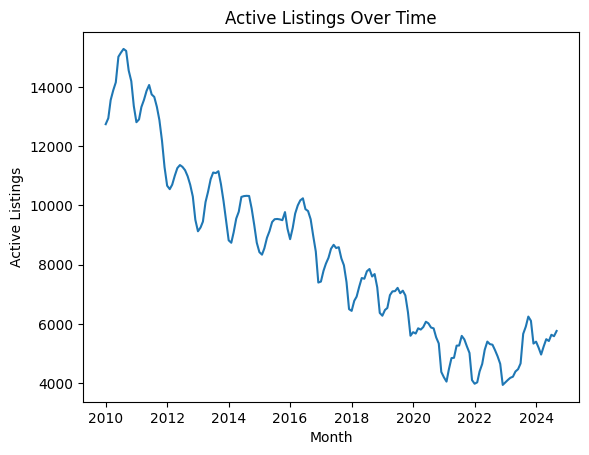

In [22]:
# Active Listings
# Creating a line plot
sns.lineplot(data=data, x=data.index, y='Active')
plt.xlabel('Month')
plt.ylabel('Active Listings')
plt.title('Active Listings Over Time')
plt.show()

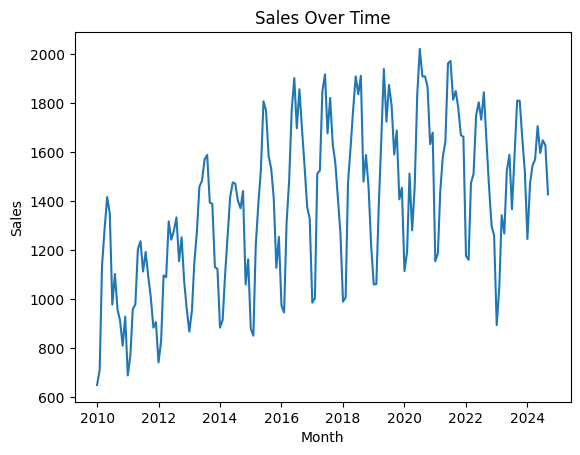

In [23]:
# Sales - Number of 
# Creating a line plot
sns.lineplot(data=data, x=data.index, y='Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.show()

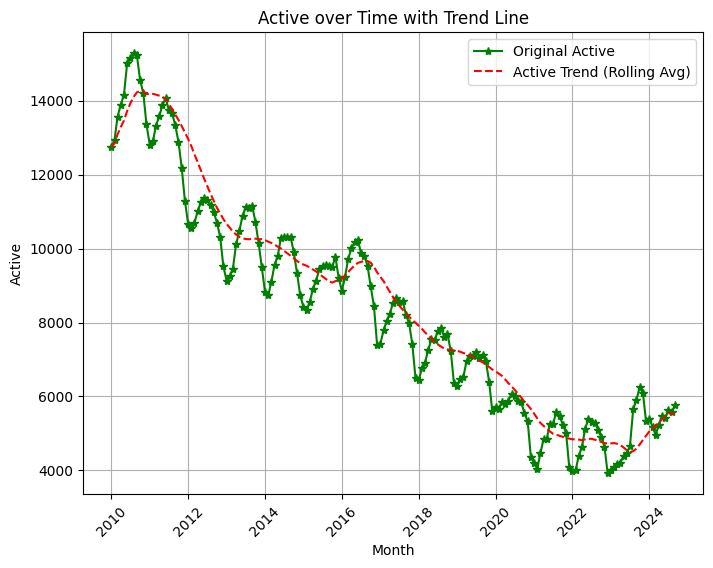

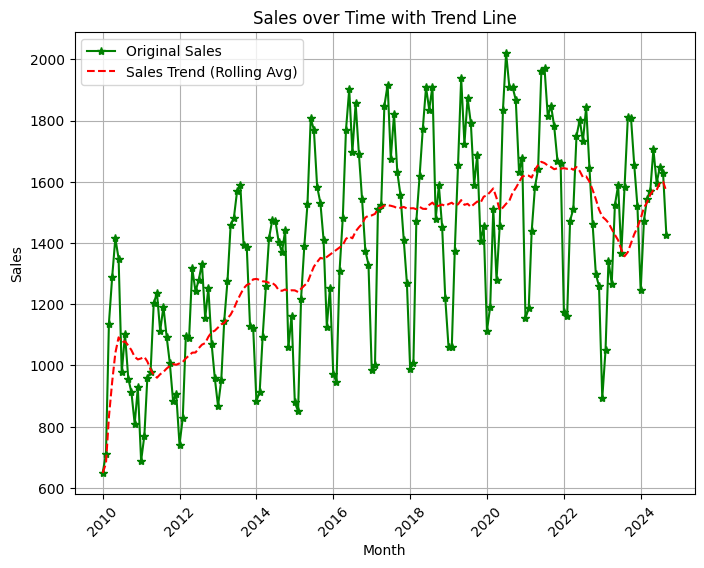

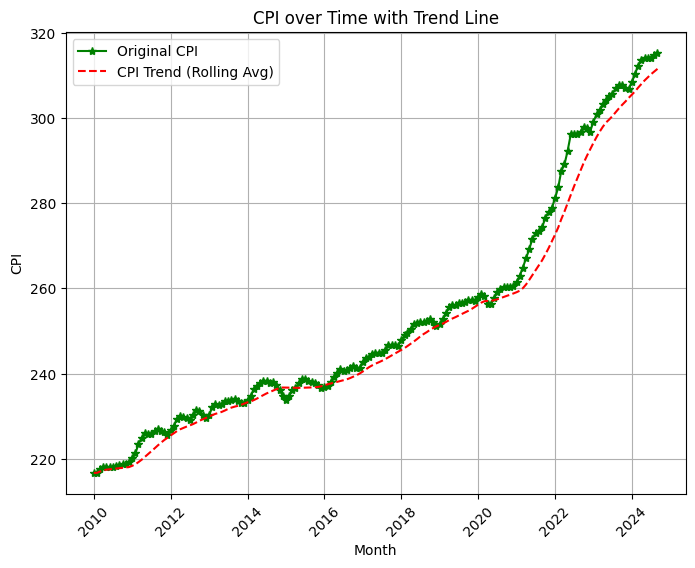

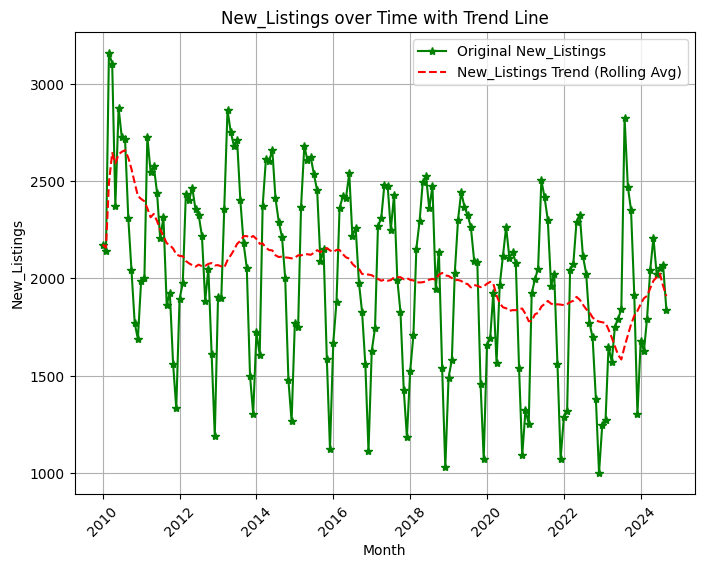

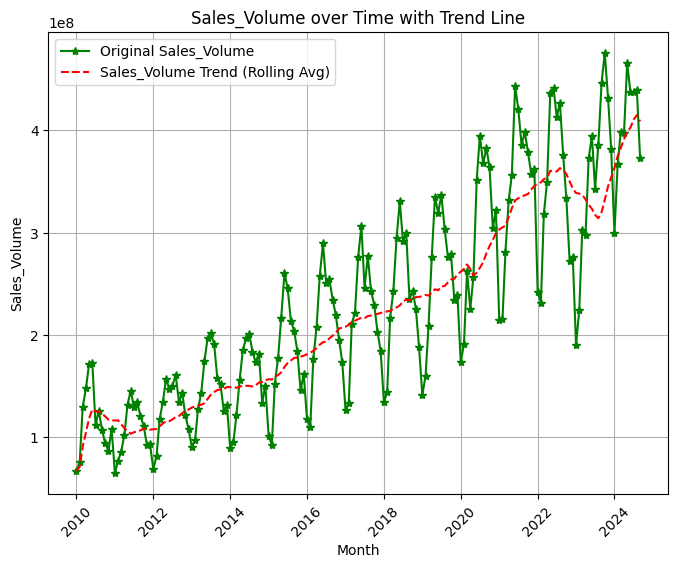

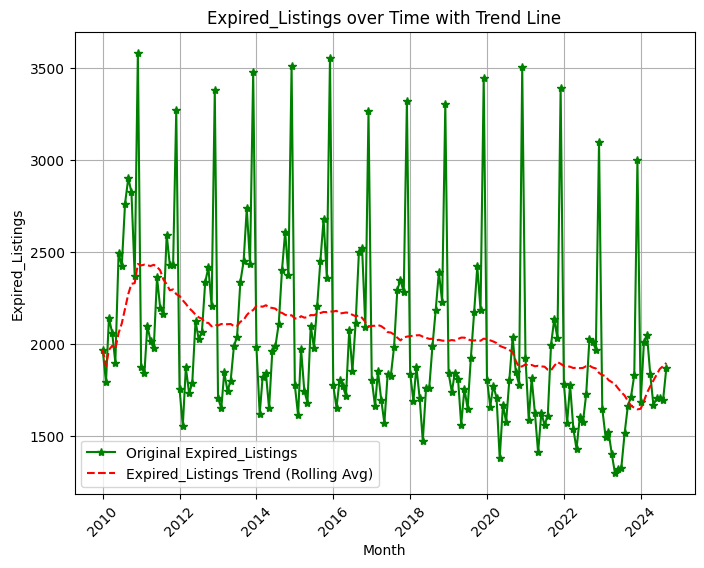

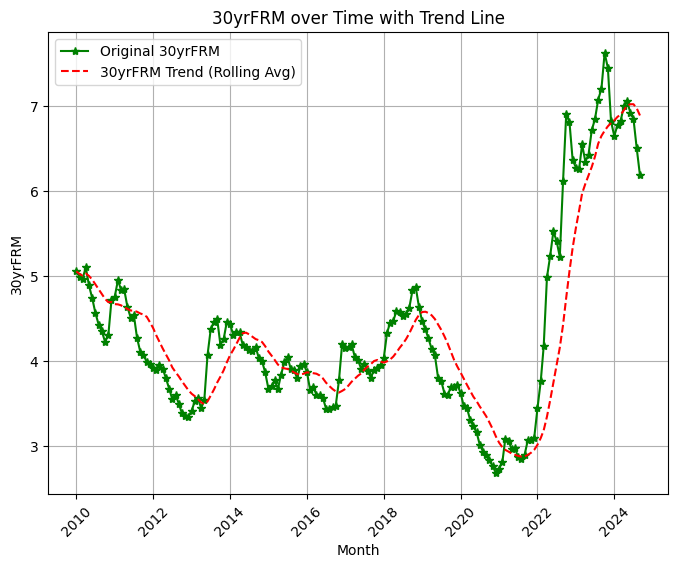

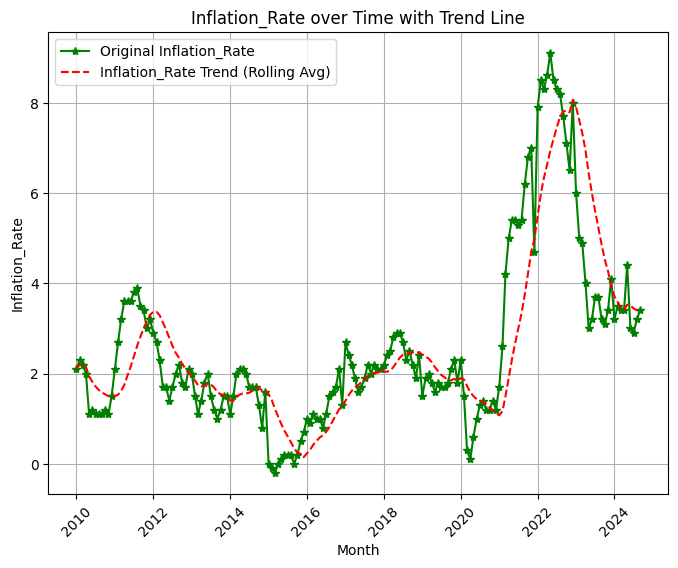

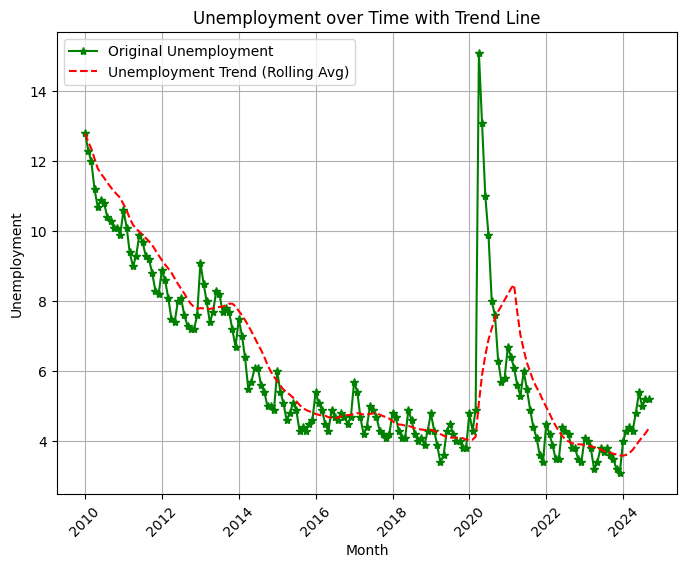

In [24]:
# Calculate rolling average with a window of 12
rolling_window = 12
data_rolling = data.rolling(window=rolling_window, min_periods=1).mean()

# Plot each column in a separate graph with a trend line
for column in data.columns:
    plt.figure(figsize=(8, 6))
    plt.plot(data.index, data[column], label=f'Original {column}', marker='*',color='green')
    plt.plot(data_rolling.index, data_rolling[column], label=f'{column} Trend (Rolling Avg)', linestyle='--',color='red')
    plt.title(f'{column} over Time with Trend Line')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()



In [25]:
# Function to perform ADF test and return stationarity status
def adf_test(series, column_name):
    result = adfuller(series)
    p_value = result[1]
    print(f"ADF Statistic for {column_name}: {result[0]}")
    print(f"p-value: {p_value}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    
    if p_value > 0.05:
        print(f"{column_name} is non-stationary.\n")
        return column_name  # Return the name of non-stationary column
    else:
        print(f"{column_name} is stationary.\n")
        return None  # Return None for stationary columns


In [26]:
# Identify non-stationary variables
non_stationary_columns = [adf_test(data[column], column) for column in data.columns]
non_stationary_columns = [col for col in non_stationary_columns if col is not None]  # Filter out None values

ADF Statistic for Active: -2.443445183601635
p-value: 0.12984777051663238
Critical Values:
	1%: -3.471118535474365
	5%: -2.8794405060097024
	10%: -2.576313761526591
Active is non-stationary.

ADF Statistic for Sales: -2.111256277376581
p-value: 0.24001255134945404
Critical Values:
	1%: -3.471374345647024
	5%: -2.8795521079291966
	10%: -2.5763733302850174
Sales is non-stationary.

ADF Statistic for CPI: 0.13809008490653352
p-value: 0.9685674995001767
Critical Values:
	1%: -3.47086589632514
	5%: -2.879330279087651
	10%: -2.57625492712671
CPI is non-stationary.

ADF Statistic for New_Listings: -2.374937633373444
p-value: 0.1489353663677322
Critical Values:
	1%: -3.47086589632514
	5%: -2.879330279087651
	10%: -2.57625492712671
New_Listings is non-stationary.

ADF Statistic for Sales_Volume: -0.14987054051724408
p-value: 0.9442390701374522
Critical Values:
	1%: -3.471374345647024
	5%: -2.8795521079291966
	10%: -2.5763733302850174
Sales_Volume is non-stationary.

ADF Statistic for Expired_Li

In [27]:
# Create a copy of the data
new_data = data.copy()

In [28]:
df = data.copy()

In [29]:
# Replace zeros and negative values with a small constant to avoid log issues
new_data[new_data <= 0] = 1e-3

In [30]:
# Apply logarithmic transformation only to non-stationary variables
new_data[non_stationary_columns] = np.log(new_data[non_stationary_columns])

In [31]:
### check whether data is staionary, parameter for I(d)

adf_test(new_data['Sales'],'Sales')

ADF Statistic for Sales: -2.346564977571406
p-value: 0.15738913779171232
Critical Values:
	1%: -3.471374345647024
	5%: -2.8795521079291966
	10%: -2.5763733302850174
Sales is non-stationary.



'Sales'

* Since we will be employing a SARIMA later , we will endure the non-stationary data with the VAR . However it is of note that perhaps in the future utilizing a normalization technique, Box-Cox Transformation or another approach might be useful. Note: an attempt was made for seasonal decomposition and Sales still retained a non-stationary output.

In [32]:
# To Remove seasonality We will apply Seasonal Decompose
# Specify the period as 12 for monthly data
# decompose_result = seasonal_decompose(new_data['Sales'], period=12)

# Plot the decomposition
# ecompose_result.plot()
# plt.show()

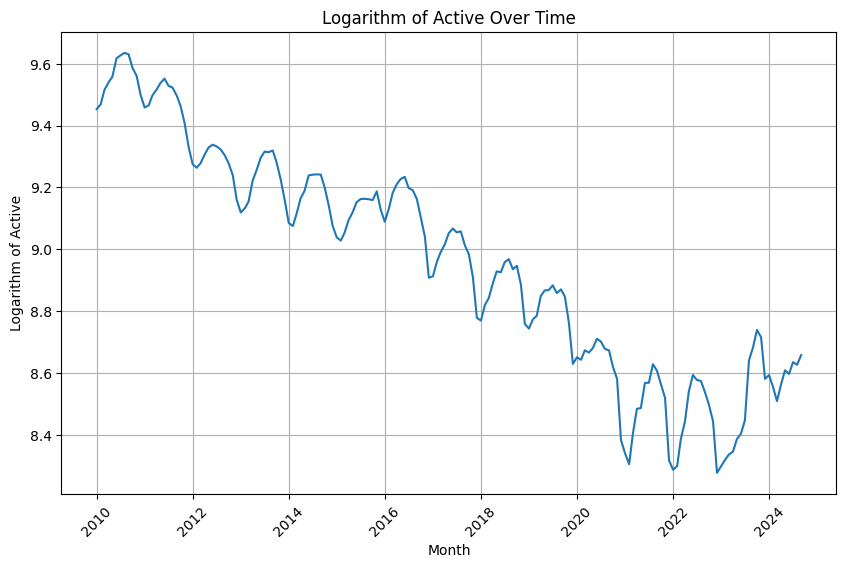

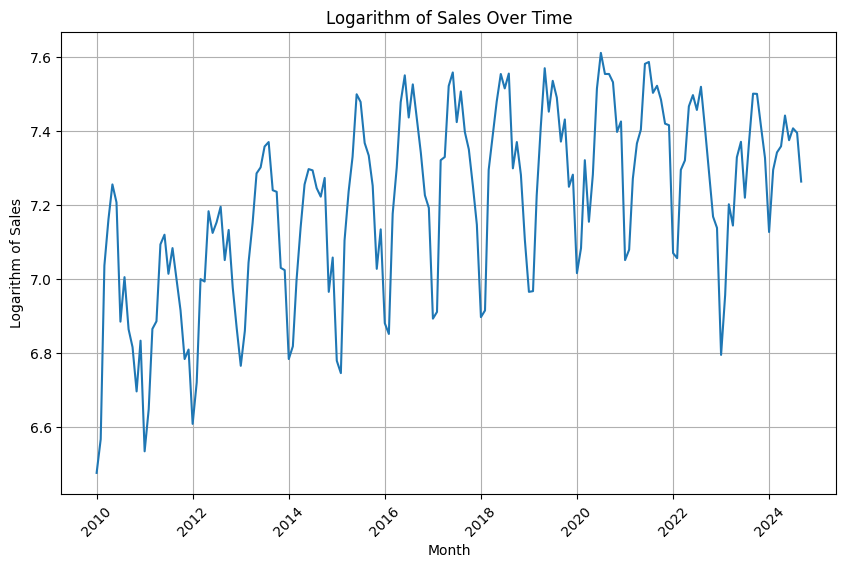

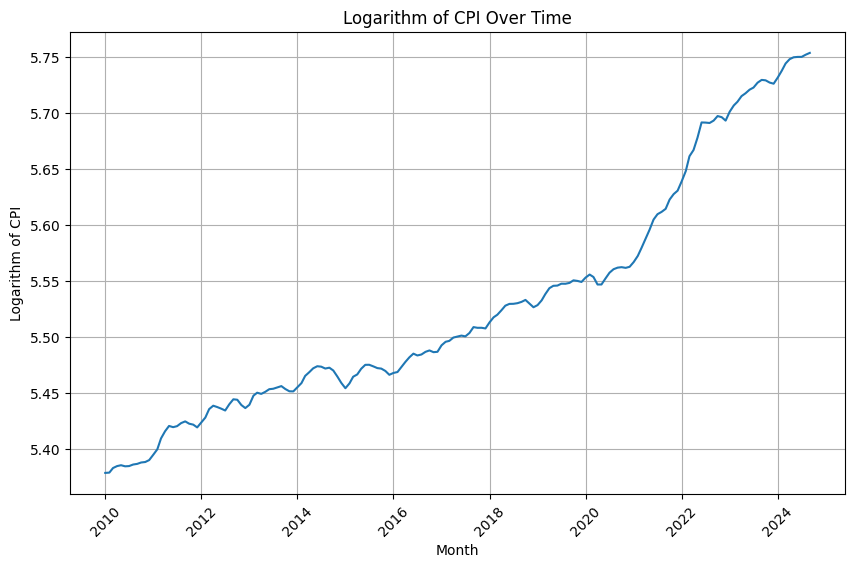

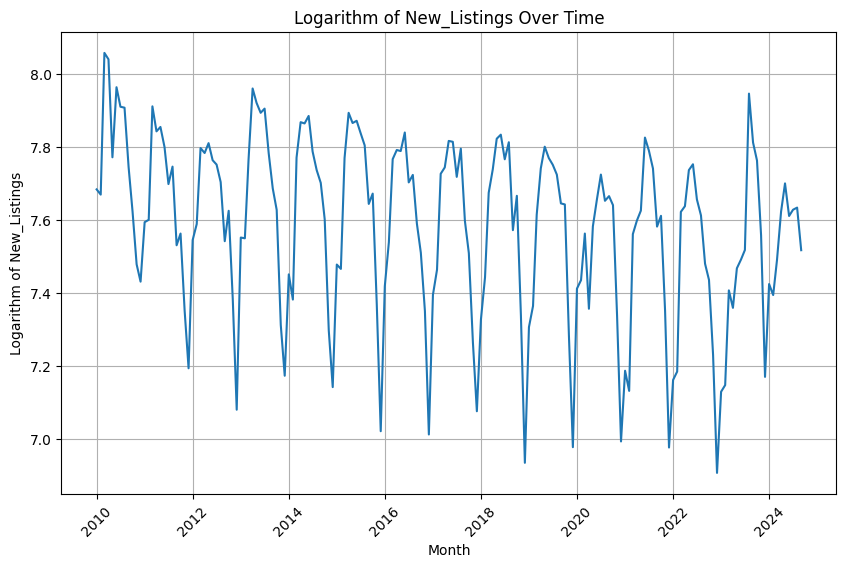

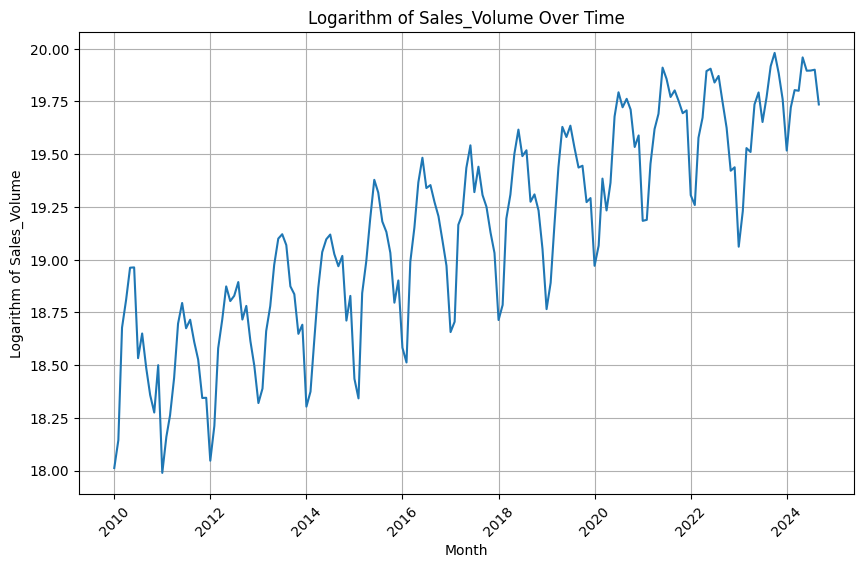

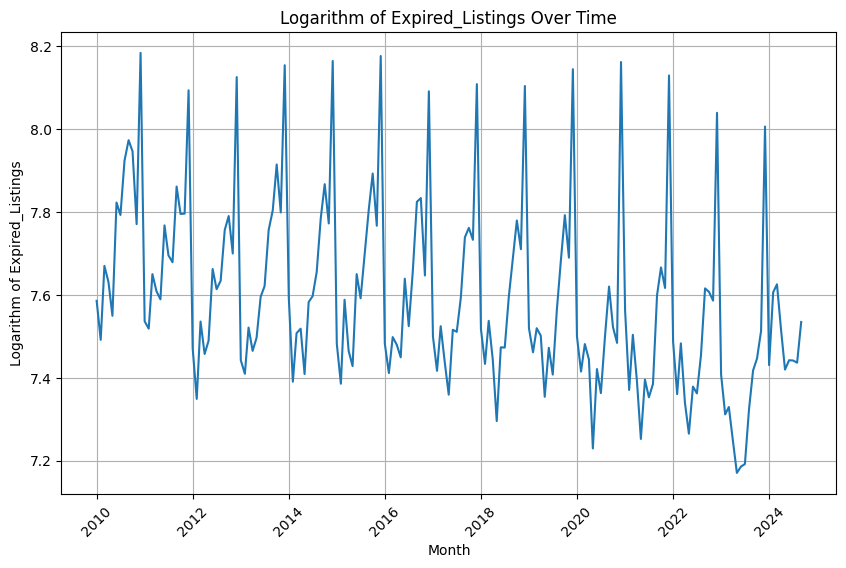

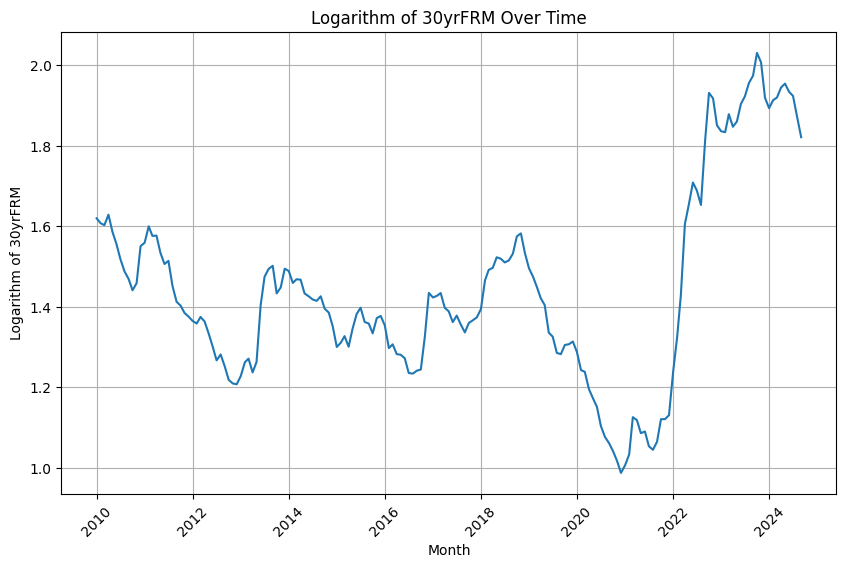

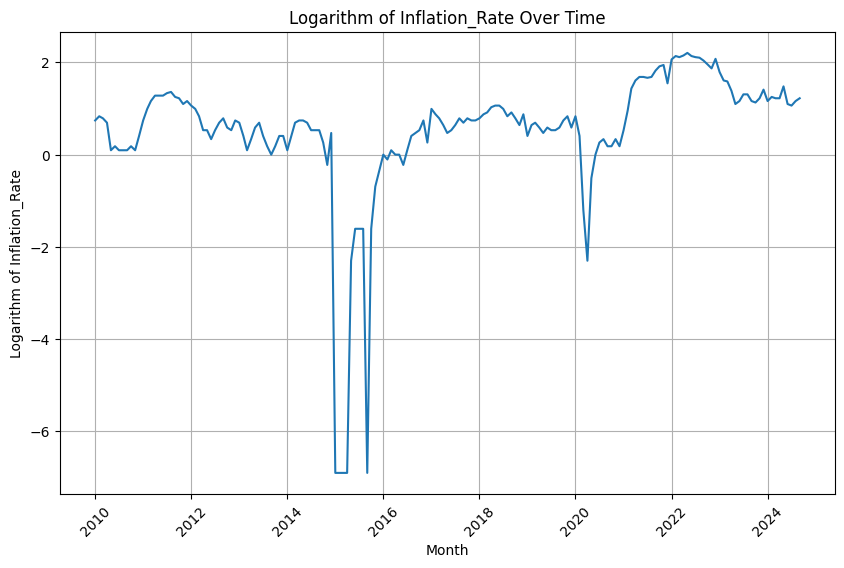

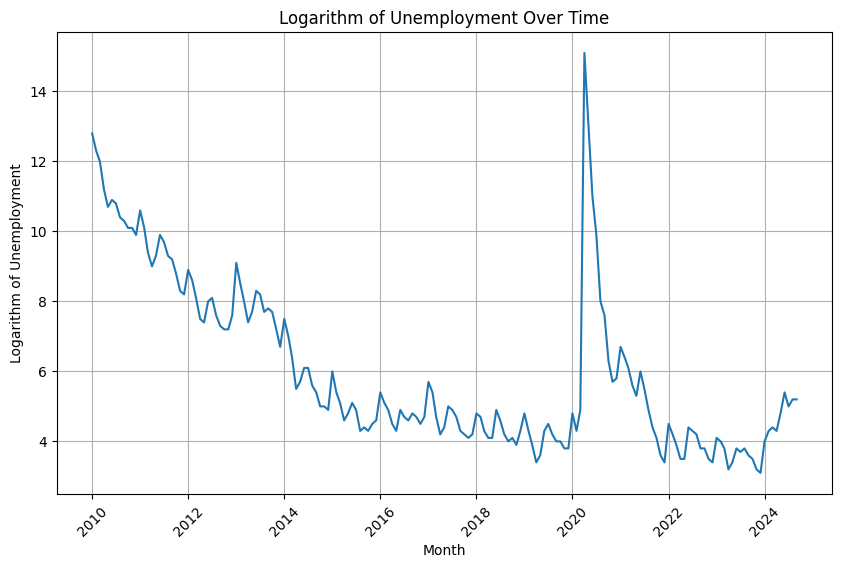

In [33]:
# Plot the transformed data for each non-stationary variable separately
for column in new_data.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=new_data, x=new_data.index, y=column)
    plt.xlabel('Month')
    plt.ylabel(f'Logarithm of {column}')
    plt.title(f'Logarithm of {column} Over Time')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


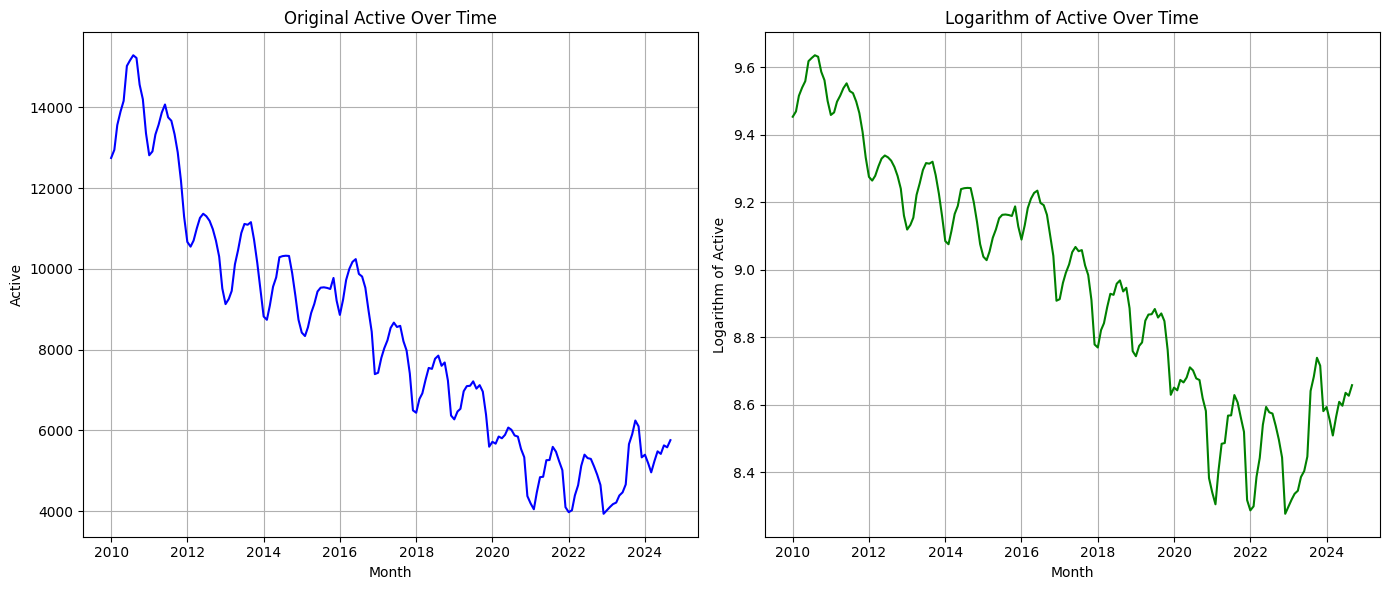

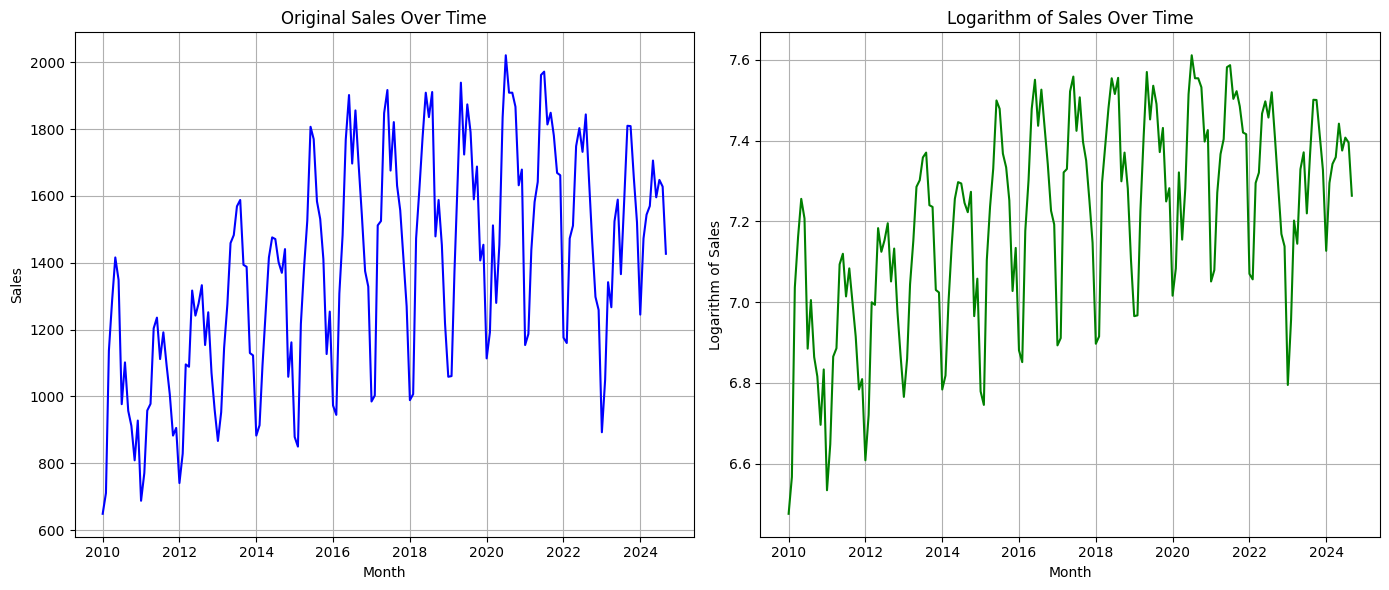

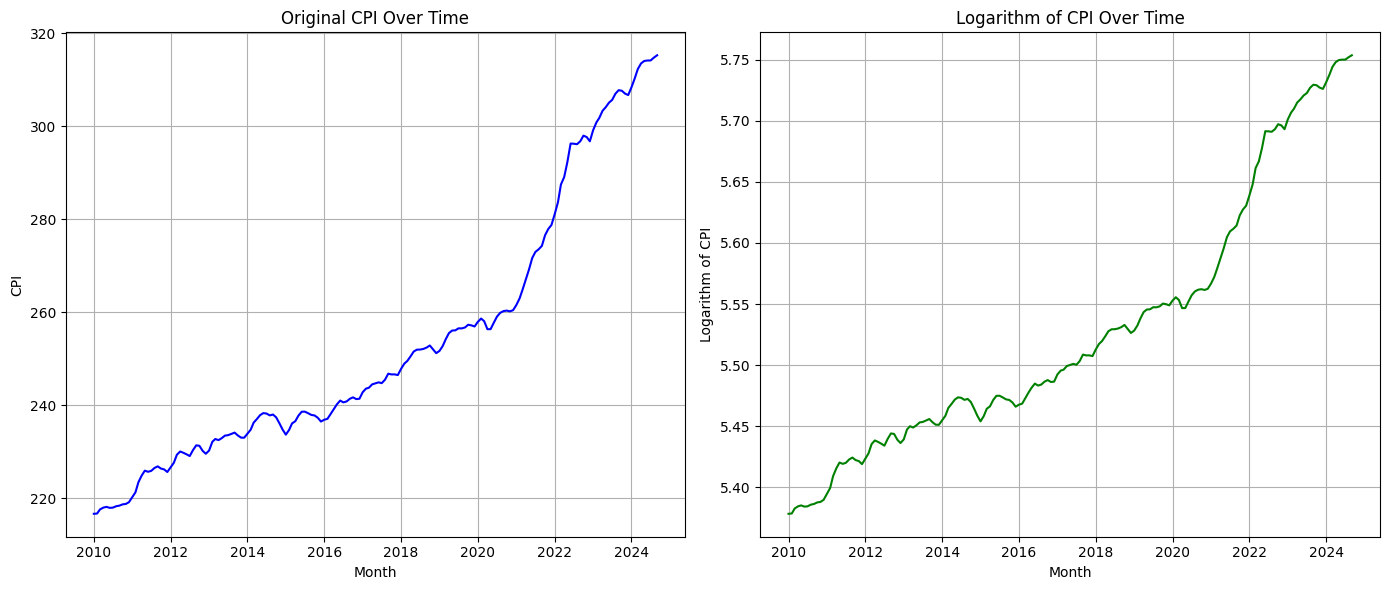

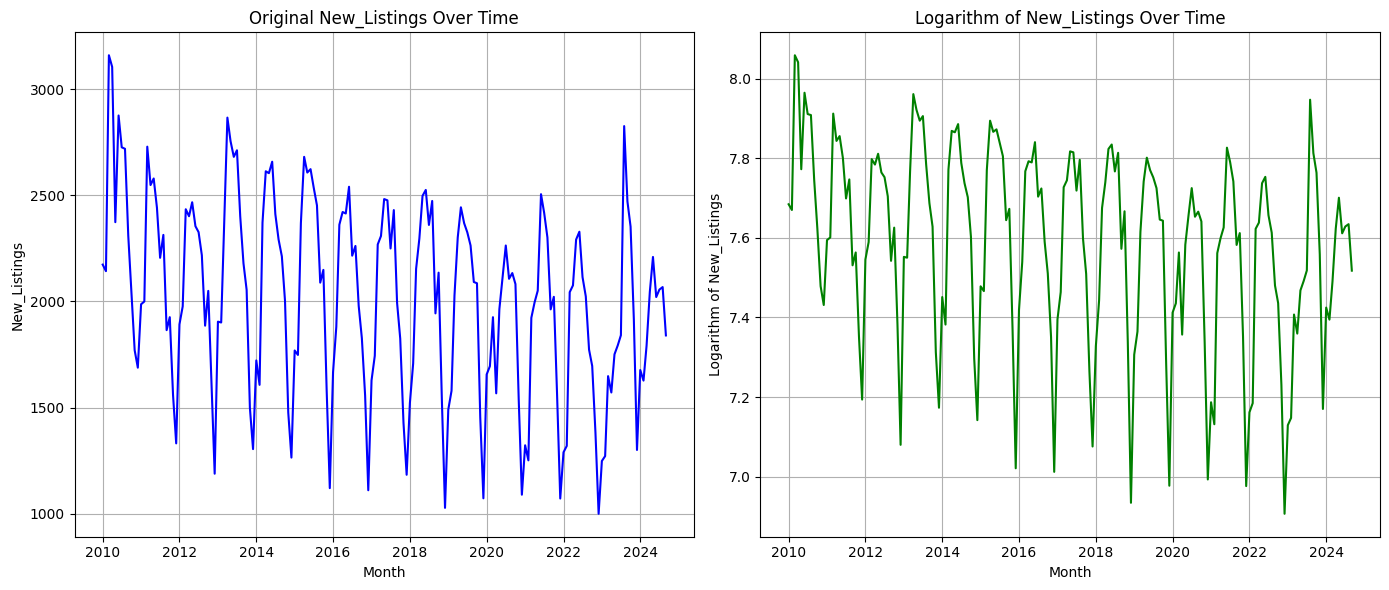

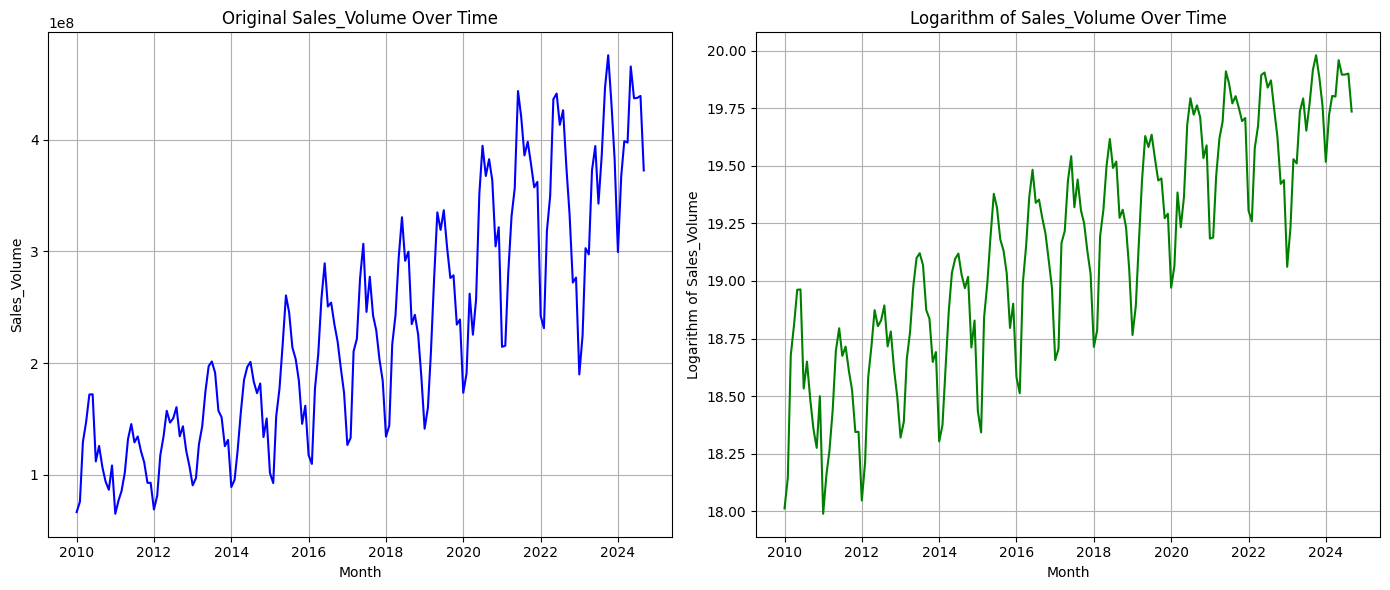

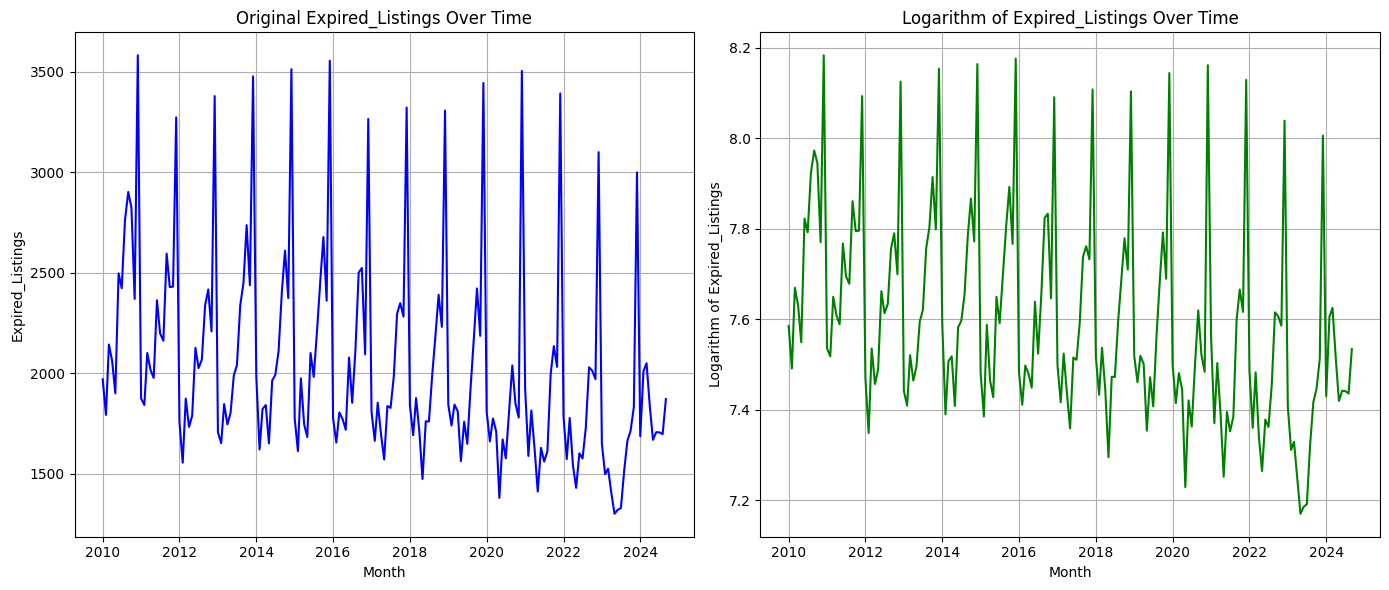

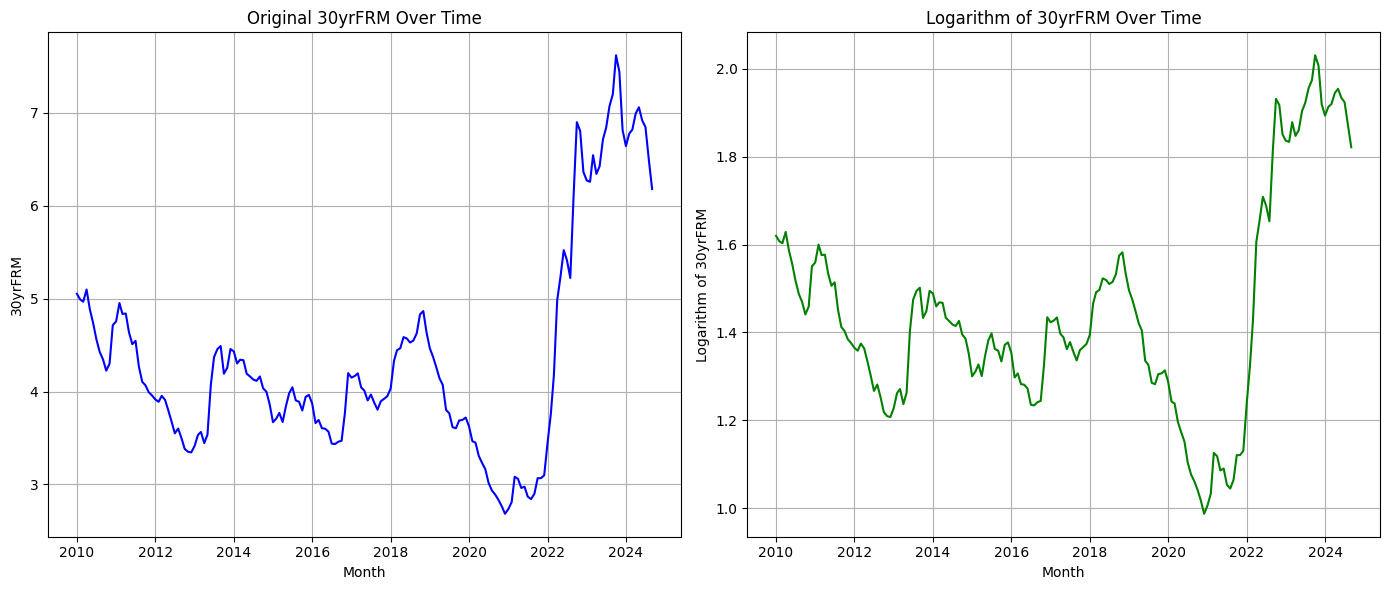

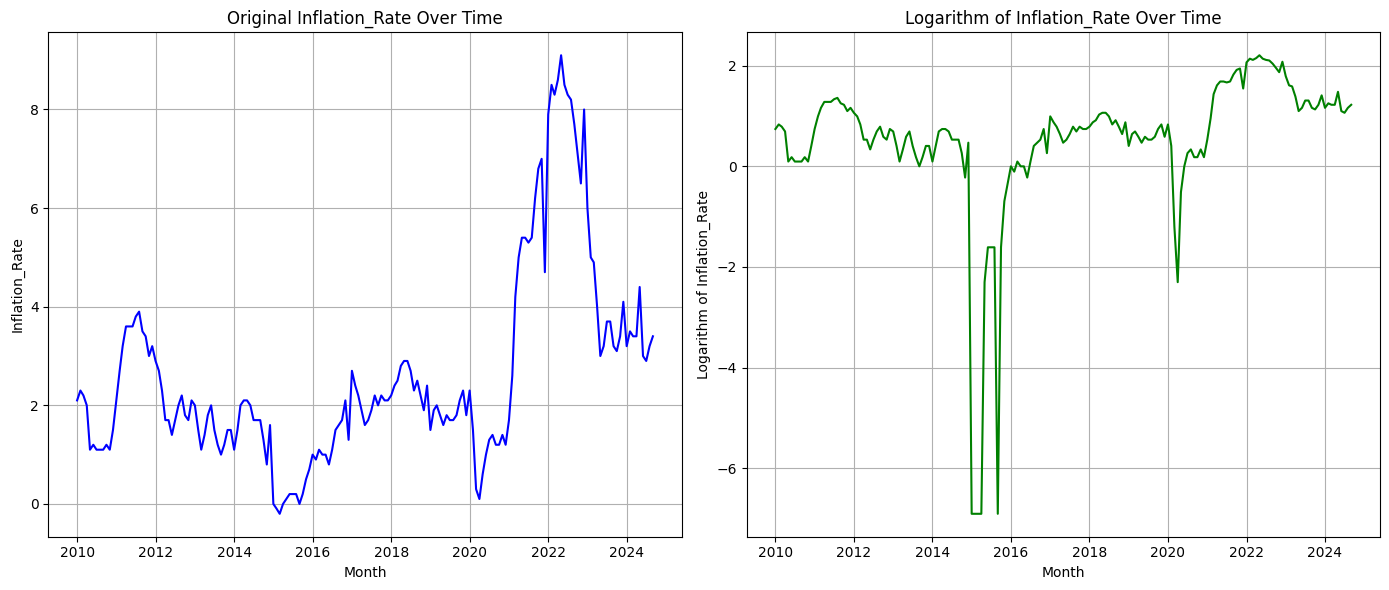

In [34]:
# Plot original vs. transformed data for each non-stationary variable
for column in non_stationary_columns:
    plt.figure(figsize=(14, 6))
    
    # Original data
    plt.subplot(1, 2, 1)
    sns.lineplot(data=data, x=data.index, y=column, color='blue')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'Original {column} Over Time')
    plt.grid(True)
    
    # Transformed data
    plt.subplot(1, 2, 2)
    sns.lineplot(data=new_data, x=new_data.index, y=column, color='green')
    plt.xlabel('Month')
    plt.ylabel(f'Logarithm of {column}')
    plt.title(f'Logarithm of {column} Over Time')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [35]:
# Fit VAR with original data 
# Fit VAR model
model = VAR(data)
results = model.fit(maxlags=2)
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Oct, 2024
Time:                     17:14:01
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    71.9664
Nobs:                     175.000    HQIC:                   70.1283
Log likelihood:          -8090.30    FPE:                8.22110e+29
AIC:                      68.8739    Det(Omega_mle):     3.25130e+29
--------------------------------------------------------------------
Results for equation Active
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                    4396.126515      1400.616300            3.139           0.002
L1.Active                   0.930278         0.125067            7.438           0.000
L1.Sales                   -0.45162

In [36]:
# Fit VAR model on log transformed data
model = VAR(new_data)
results = model.fit(maxlags=2)
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Oct, 2024
Time:                     17:14:01
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -42.8474
Nobs:                     175.000    HQIC:                  -44.6855
Log likelihood:           1955.91    FPE:                1.12702e-20
AIC:                     -45.9399    Det(Omega_mle):     4.45716e-21
--------------------------------------------------------------------
Results for equation Active
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       4.505755         0.998211            4.514           0.000
L1.Active                   0.855546         0.126791            6.748           0.000
L1.Sales                   -0.15018

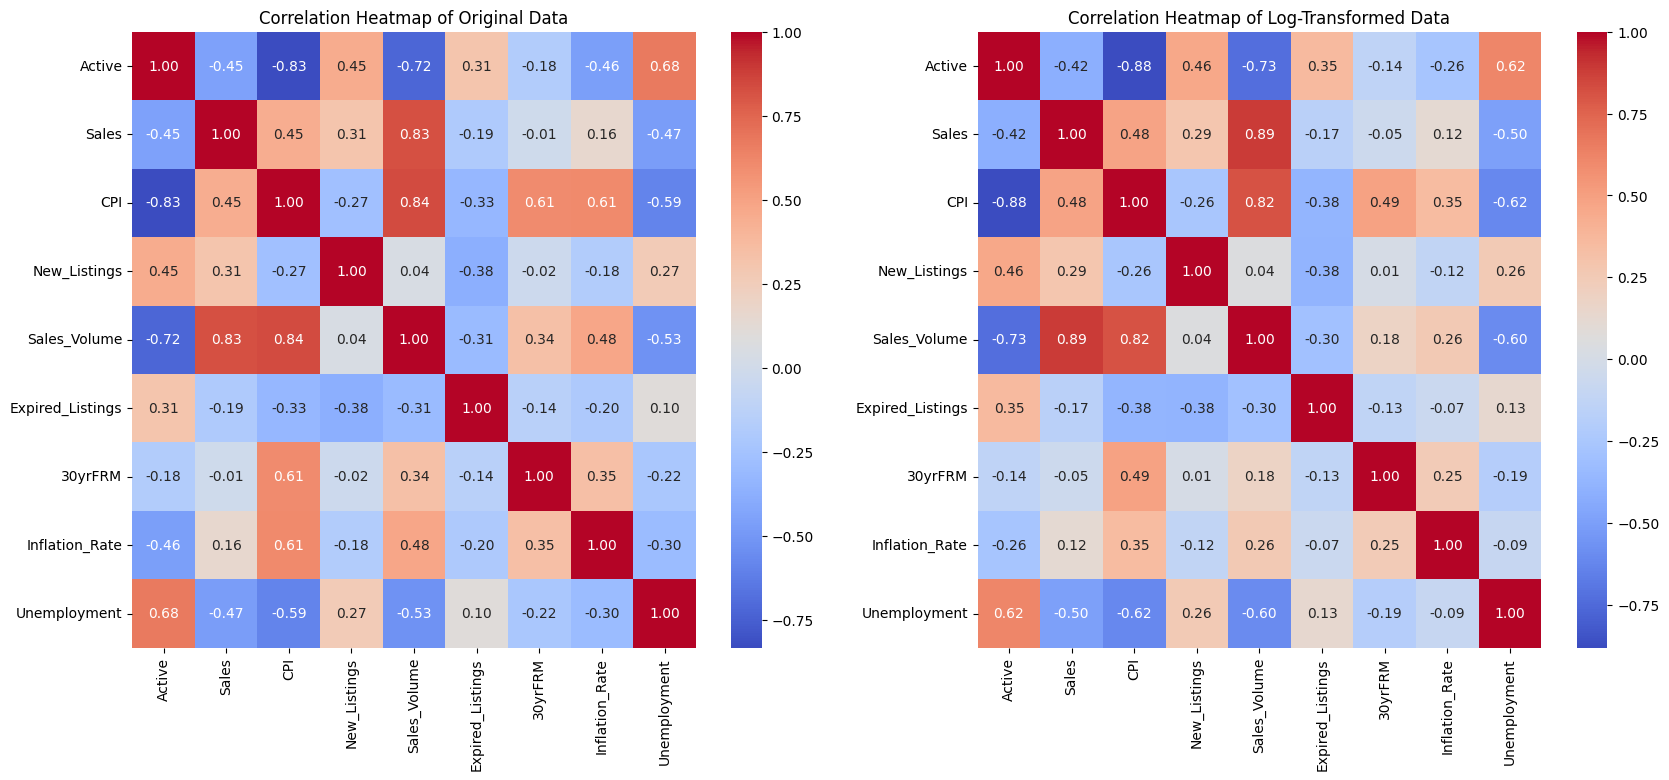

In [37]:
# Calculate correlation matrices
corr_orig = data.corr()
corr_log  = new_data.corr()

# Set up the matplotlib figure to plot side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot the heatmap for original data
sns.heatmap(corr_orig, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap of Original Data")

# Plot the heatmap for log-transformed data
sns.heatmap(corr_log, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap of Log-Transformed Data")

# Show the plots
plt.show()

#### Drop CPI due to high correlation with Active variable ( -.84 and -.89)

In [38]:
# Drop the Sales_Volume column from the original data
data = data.drop(columns=['CPI'])

# Drop the Sales_Volume column from the log-transformed data
new_data = new_data.drop(columns=['CPI'])

In [39]:
# Fit VAR model on original data without CPI
model2 = VAR(data)
results_orig2 = model2.fit(maxlags=2)
print(results_orig2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Oct, 2024
Time:                     17:14:02
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    72.6441
Nobs:                     175.000    HQIC:                   71.1823
Log likelihood:          -7991.67    FPE:                3.04048e+30
AIC:                      70.1847    Det(Omega_mle):     1.44823e+30
--------------------------------------------------------------------
Results for equation Active
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                     903.124168       341.115897            2.648           0.008
L1.Active                   0.934600         0.129951            7.192           0.000
L1.Sales                   -0.35725

In [40]:
# Fit VAR model on log-transformed data without CPI
model_log2 = VAR(new_data)
results_log2 = model_log2.fit(maxlags=2)
print(results_log2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Oct, 2024
Time:                     17:14:02
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -31.2193
Nobs:                     175.000    HQIC:                  -32.6811
Log likelihood:           1096.38    FPE:                2.37480e-15
AIC:                     -33.6788    Det(Omega_mle):     1.13115e-15
--------------------------------------------------------------------
Results for equation Active
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       2.355715         0.671833            3.506           0.000
L1.Active                   0.901430         0.127312            7.081           0.000
L1.Sales                   -0.08530

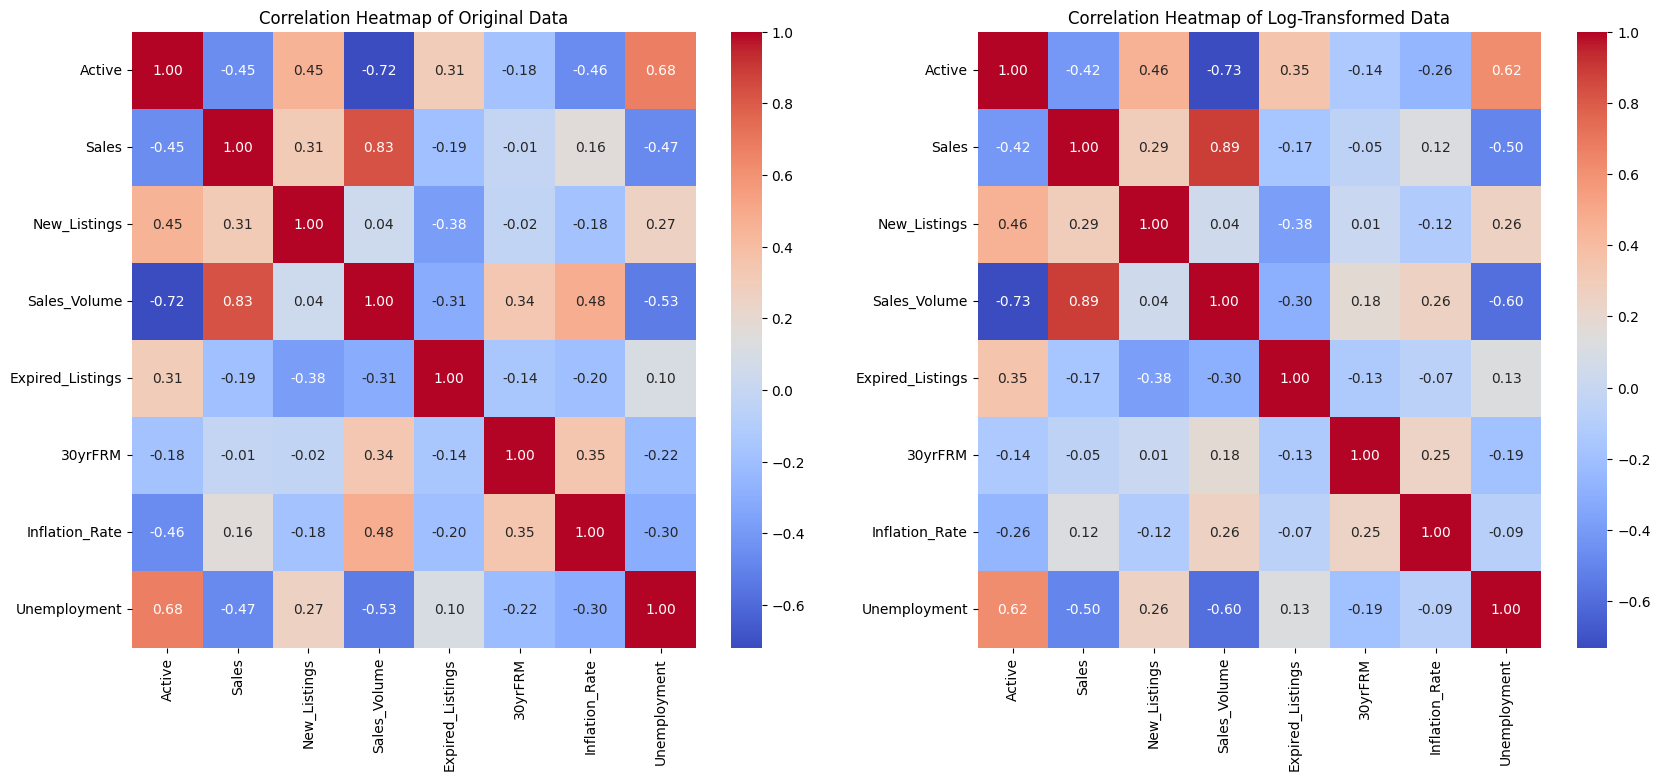

In [41]:
# Calculate correlation matrices
corr_orig = data.corr()
corr_log  = new_data.corr()

# Set up the matplotlib figure to plot side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot the heatmap for original data
sns.heatmap(corr_orig, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap of Original Data")

# Plot the heatmap for log-transformed data
sns.heatmap(corr_log, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap of Log-Transformed Data")

# Show the plots
plt.show()

#### Drop Sales Volume
* Sales Volume has a high correlation with Sales (.71) so we will drop this value as its very likely the linear relationship is already represented by Sales

In [42]:
# Drop the Sales_Volume column from the original data
data = data.drop(columns=['Sales_Volume'])

# Drop the Sales_Volume column from the log-transformed data
new_data = new_data.drop(columns=['Sales_Volume'])

In [43]:
# Fit VAR model on original data without Sales_Volume and CPI
model3 = VAR(data)
results_orig3 = model3.fit(maxlags=2)
print(results_orig3.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Oct, 2024
Time:                     17:14:03
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    39.2630
Nobs:                     175.000    HQIC:                   38.1344
Log likelihood:          -4902.56    FPE:                1.69167e+16
AIC:                      37.3641    Det(Omega_mle):     9.51274e+15
--------------------------------------------------------------------
Results for equation Active
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                    1070.613735       313.115138            3.419           0.001
L1.Active                   0.955581         0.128482            7.437           0.000
L1.Sales                   -0.72501

In [44]:
# Fit VAR model on log-transformed data without Sales_Volume and CPI
model_log3 = VAR(new_data)
results_log3 = model_log3.fit(maxlags=2)
print(results_log3.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Oct, 2024
Time:                     17:14:03
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -25.4677
Nobs:                     175.000    HQIC:                  -26.5963
Log likelihood:           761.374    FPE:                1.30658e-12
AIC:                     -27.3666    Det(Omega_mle):     7.34730e-13
--------------------------------------------------------------------
Results for equation Active
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       1.411832         0.297465            4.746           0.000
L1.Active                   0.926366         0.125605            7.375           0.000
L1.Sales                   -0.11082

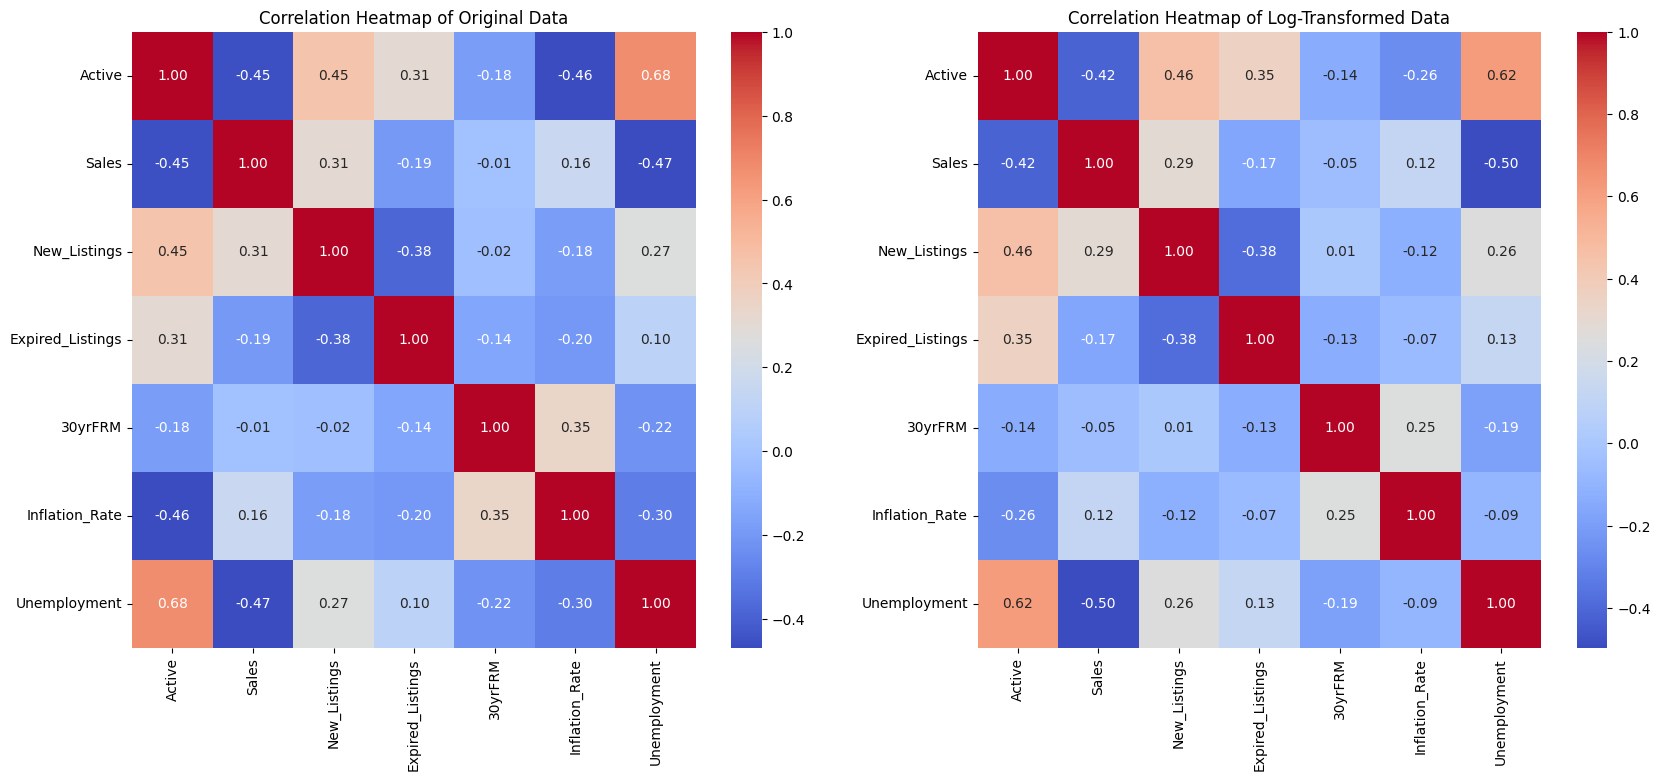

In [45]:
# Calculate correlation matrices
corr_orig = data.corr()
corr_log  = new_data.corr()

# Set up the matplotlib figure to plot side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot the heatmap for original data
sns.heatmap(corr_orig, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap of Original Data")

# Plot the heatmap for log-transformed data
sns.heatmap(corr_log, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap of Log-Transformed Data")

# Show the plots
plt.show()

In [46]:
# Fit a VAR model with log transformed data 
# Fit a VAR model
model = VAR(new_data)
fitted_model = model.fit(maxlags=1, ic='aic')

# Summary of the fitted model
print(fitted_model.summary())

# Forecasting
lag_order = fitted_model.k_ar
forecast = fitted_model.forecast(new_data.values[-lag_order:], steps=12)

print(f"Forecast:\n{forecast}")


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 10, Oct, 2024
Time:                     17:14:03
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -25.7428
Nobs:                     176.000    HQIC:                  -26.3424
Log likelihood:           662.009    FPE:                2.41055e-12
AIC:                     -26.7516    Det(Omega_mle):     1.76596e-12
--------------------------------------------------------------------
Results for equation Active
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.624621         0.219313            2.848           0.004
L1.Active                   0.913595         0.022733           40.189           0.000
L1.Sales                   -0.11001

In [47]:
# Convert log-transformed forecast back to the original scale
original_scale_forecast = np.exp(forecast)

# Round the forecast to 2 decimal places
rounded_forecast = np.round(original_scale_forecast, 2)

# Disable scientific notation for printing
np.set_printoptions(suppress=True)

# Print the rounded forecast
print(f"Original Scale Forecast (Rounded):\n{rounded_forecast}")


Original Scale Forecast (Rounded):
[[5804.44 1402.95 1877.68 1784.46    6.18    3.48  175.03]
 [5878.39 1420.89 1919.19 1767.51    6.19    3.56  163.82]
 [5956.94 1442.51 1944.93 1772.6     6.19    3.61  153.19]
 [6030.2  1457.33 1955.39 1786.5     6.19    3.63  144.72]
 [6094.75 1463.13 1955.5  1802.34    6.19    3.62  138.66]
 [6150.86 1461.44 1950.43 1816.5     6.19    3.59  134.74]
 [6200.52 1455.03 1944.02 1827.63    6.18    3.53  132.51]
 [6246.02 1446.53 1938.52 1835.76    6.18    3.47  131.53]
 [6289.3  1437.77 1934.82 1841.6     6.17    3.4   131.42]
 [6331.64 1429.75 1932.98 1845.97    6.16    3.32  131.92]
 [6373.72 1422.85 1932.64 1849.6     6.16    3.25  132.85]
 [6415.77 1417.02 1933.32 1852.95    6.15    3.18  134.09]]


In [48]:

# Assuming 'forecast' is the array with forecasted values and 'new_data.columns' contains the column names

# Identify which column corresponds to unemployment
unemployment_column = 'Unemployment'  # Replace with the actual name of your unemployment column
columns = new_data.columns

# Convert only the log-transformed columns back to their original scale
original_scale_forecast = np.exp(forecast)

# Replace the unemployment column with the original forecasted values
unemployment_index = columns.get_loc(unemployment_column)
original_scale_forecast[:, unemployment_index] = forecast[:, unemployment_index]

# Create a DataFrame with the results
forecast_df = pd.DataFrame(original_scale_forecast, columns=columns)

# Round the values to 2 decimal places
forecast_df = forecast_df.round(2)

# Display the forecast with corresponding columns
print(f"Original Scale Forecast:\n{forecast_df}")


Original Scale Forecast:
     Active    Sales  New_Listings  Expired_Listings  30yrFRM  Inflation_Rate  \
0   5804.44  1402.95       1877.68           1784.46     6.18            3.48   
1   5878.39  1420.89       1919.19           1767.51     6.19            3.56   
2   5956.94  1442.51       1944.93           1772.60     6.19            3.61   
3   6030.20  1457.33       1955.39           1786.50     6.19            3.63   
4   6094.75  1463.13       1955.50           1802.34     6.19            3.62   
5   6150.86  1461.44       1950.43           1816.50     6.19            3.59   
6   6200.52  1455.03       1944.02           1827.63     6.18            3.53   
7   6246.02  1446.53       1938.52           1835.76     6.18            3.47   
8   6289.30  1437.77       1934.82           1841.60     6.17            3.40   
9   6331.64  1429.75       1932.98           1845.97     6.16            3.32   
10  6373.72  1422.85       1932.64           1849.60     6.16            3.25   
11 

In [49]:
forecast_df.head(12)

Active    Sales  New_Listings  Expired_Listings  30yrFRM  Inflation_Rate  \
0   5804.44  1402.95       1877.68           1784.46     6.18            3.48   
1   5878.39  1420.89       1919.19           1767.51     6.19            3.56   
2   5956.94  1442.51       1944.93           1772.60     6.19            3.61   
3   6030.20  1457.33       1955.39           1786.50     6.19            3.63   
4   6094.75  1463.13       1955.50           1802.34     6.19            3.62   
5   6150.86  1461.44       1950.43           1816.50     6.19            3.59   
6   6200.52  1455.03       1944.02           1827.63     6.18            3.53   
7   6246.02  1446.53       1938.52           1835.76     6.18            3.47   
8   6289.30  1437.77       1934.82           1841.60     6.17            3.40   
9   6331.64  1429.75       1932.98           1845.97     6.16            3.32   
10  6373.72  1422.85       1932.64           1849.60     6.16            3.25   
11  6415.77  1417.02       1933.32           1852.95     6.15            3.18   

    Unemployment  
0           5.16  
1           5.10  
2           5.03  
3           4.97  
4           4.93  
5           4.90  
6           4.89  
7           4.88  
8           4.88  
9           4.88  
10          4.89  
11          4.90

In [50]:
forecast_df['Sales'].head(12)

0     1402.95
1     1420.89
2     1442.51
3     1457.33
4     1463.13
5     1461.44
6     1455.03
7     1446.53
8     1437.77
9     1429.75
10    1422.85
11    1417.02
Name: Sales, dtype: float64

In [51]:
# most of the coefficients for lagged variables have a high p-value, significantly greater than .05, and thus they are not significant. This may suggest that there is some multi-collinearity- 
# which we will need to address

#### interpretation of VAR model: 
- lower AIC (Akaike Information Criterion) indicates a better model fit reflects the model is fitting very well
- BIC ( Bayesian Information Criterion )- lower value indicates a better model , similar to AIC. a negative value would suggest that the model is fitting extremely well. A very high log likelihood of 3074 raises some concerns of overfitting.  

 

In [52]:
new_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2010-01-01 to 2024-09-01
Freq: MS
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Active            177 non-null    float64
 1   Sales             177 non-null    float64
 2   New_Listings      177 non-null    float64
 3   Expired_Listings  177 non-null    float64
 4   30yrFRM           177 non-null    float64
 5   Inflation_Rate    177 non-null    float64
 6   Unemployment      177 non-null    float64
dtypes: float64(7)
memory usage: 15.1 KB


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-314.190, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-162.863, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-310.687, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-248.366, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-164.707, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-272.343, Time=0.56 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-334.514, Time=0.55 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-180.406, Time=0.29 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-335.847, Time=1.16 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-336.973, Time=1.36 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-347.426, Time=1.58 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-337.961, Time=1.44 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=-338.992, Time=1.26 sec
 ARIMA(2,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(3,1,2)(2,0,2)[12]

C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  177
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 12)   Log Likelihood                 207.866
Date:                            Thu, 10 Oct 2024   AIC                           -387.733
Time:                                    17:14:44   BIC                           -343.346
Sample:                                01-01-2010   HQIC                          -369.730
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Active              -0.2789      0.138     -2.020      0.043      -0.550      -0.008
30yrFRM          

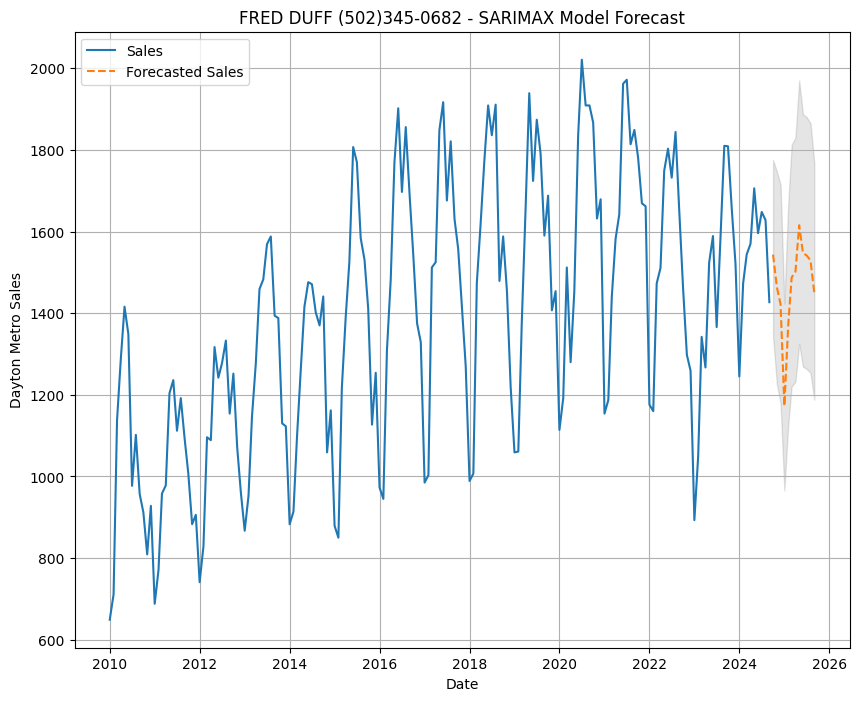

In [53]:
# Define the endogenous and exogenous variables
endog = new_data['Sales']
exog = new_data[['Active', '30yrFRM', 'Inflation_Rate','Expired_Listings','New_Listings','Unemployment']]

# Use auto_arima to find the best SARIMAX parameters
auto_arima_model = pm.auto_arima(endog, exogenous=exog, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_arima_model.summary())

# Fit SARIMAX model
p, d, q = auto_arima_model.order
P, D, Q, s = auto_arima_model.seasonal_order
sarimax_model = SARIMAX(endog, exog=exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = sarimax_model.fit(disp=False)
print(sarimax_result.summary())

# Forecast future values
forecast_steps = 12
exog_forecast = exog[-forecast_steps:]
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_SARIMA_data = forecast.summary_frame()
forecast_SARIMA_data.index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Convert log-transformed columns back to the original scale
log_transformed_columns = ['mean', 'mean_ci_lower', 'mean_ci_upper']  
forecast_SARIMA_data[log_transformed_columns] = np.exp(forecast_SARIMA_data[log_transformed_columns])

# Print forecasted values
print("Forecasted Values:\n", forecast_SARIMA_data)

# Plot the forecast
plt.figure(figsize=(10, 8))
plt.plot(data.index, data['Sales'], label='Sales')
plt.plot(forecast_SARIMA_data.index, forecast_SARIMA_data['mean'], label='Forecasted Sales', linestyle='--')
plt.fill_between(forecast_SARIMA_data.index, forecast_SARIMA_data['mean_ci_lower'], forecast_SARIMA_data['mean_ci_upper'], color='k', alpha=0.10)
plt.title('FRED DUFF (502)345-0682 - SARIMAX Model Forecast')
plt.xlabel('Date')
plt.ylabel('Dayton Metro Sales')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
original_scale_forecast

array([[5804.43898591, 1402.94827474, 1877.67996402, 1784.4623144 ,
           6.18316512,    3.48055595,    5.16496263],
       [5878.39043866, 1420.89111614, 1919.19211387, 1767.51257365,
           6.18951321,    3.55617475,    5.09878981],
       [5956.93967479, 1442.51483091, 1944.93485652, 1772.59546781,
           6.19390935,    3.60653245,    5.03168769],
       [6030.20069953, 1457.33086898, 1955.39133899, 1786.49682449,
           6.19475956,    3.62771701,    4.97477298],
       [6094.74730727, 1463.1299424 , 1955.49773215, 1802.33711563,
           6.19236826,    3.61986465,    4.93202489],
       [6150.86075909, 1461.43594849, 1950.42611563, 1816.49825014,
           6.18774216,    3.58661644,    4.90337047],
       [6200.51521563, 1455.03190073, 1944.02392171, 1827.62680228,
           6.18189375,    3.5339938 ,    4.88668792],
       [6246.02159422, 1446.52868817, 1938.51810955, 1835.76209356,
           6.17553969,    3.46874543,    4.87921529],
       [6289.30211785, 1

In [55]:
data['Sales']

Month
2010-01-01     649.0
2010-02-01     711.0
2010-03-01    1137.0
2010-04-01    1289.0
2010-05-01    1416.0
               ...  
2024-05-01    1706.0
2024-06-01    1596.0
2024-07-01    1648.0
2024-08-01    1628.0
2024-09-01    1427.0
Freq: MS, Name: Sales, Length: 177, dtype: float64

In [56]:
forecast_SARIMA_data['mean']

2024-10-01    1543.526154
2024-11-01    1463.816243
2024-12-01    1422.187671
2025-01-01    1172.428161
2025-02-01    1369.893483
2025-03-01    1487.487986
2025-04-01    1501.531181
2025-05-01    1615.505169
2025-06-01    1547.372459
2025-07-01    1541.412526
2025-08-01    1529.237834
2025-09-01    1449.347447
Freq: MS, Name: mean, dtype: float64

In [57]:
datacopy = data.copy()

In [58]:
# Add constant for intercept
exog_with_const = sm.add_constant(exog)

# Calculate VIF for each exogenous variable
vif_data = pd.DataFrame()
vif_data["Variable"] = exog_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(exog_with_const.values, i) for i in range(exog_with_const.shape[1])]

print(vif_data)


           Variable          VIF
0             const  4312.072244
1            Active     3.379156
2           30yrFRM     1.117368
3    Inflation_Rate     1.158913
4  Expired_Listings     2.109621
5      New_Listings     2.271049
6      Unemployment     1.761074


In [59]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using the ADF test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

adf_test(datacopy['Sales'])


ADF Statistic: -2.111256277376581
p-value: 0.24001255134945404
Critical Value 1%: -3.471374345647024
Critical Value 5%: -2.8795521079291966
Critical Value 10%: -2.5763733302850174


In [60]:
# If p-value > 0.05, the series is non-stationary
# Apply differencing to make the series stationary
datacopy['Sales_diff'] = datacopy['Sales'].diff()

In [61]:
for column in exog.columns:
    print(f"ADF test for {column}")
    adf_test(datacopy[column])


ADF test for Active
ADF Statistic: -2.443445183601635
p-value: 0.12984777051663238
Critical Value 1%: -3.471118535474365
Critical Value 5%: -2.8794405060097024
Critical Value 10%: -2.576313761526591
ADF test for 30yrFRM
ADF Statistic: -1.787196782675802
p-value: 0.38683640606638303
Critical Value 1%: -3.4691814633722453
Critical Value 5%: -2.878595143532943
Critical Value 10%: -2.5758625549741803
ADF test for Inflation_Rate
ADF Statistic: -1.8805981776698806
p-value: 0.3412426583148295
Critical Value 1%: -3.4680615871598537
Critical Value 5%: -2.8781061899535128
Critical Value 10%: -2.5756015922004134
ADF test for Expired_Listings
ADF Statistic: -2.1860483755305737
p-value: 0.21134800225359618
Critical Value 1%: -3.471118535474365
Critical Value 5%: -2.8794405060097024
Critical Value 10%: -2.576313761526591
ADF test for New_Listings
ADF Statistic: -2.374937633373444
p-value: 0.1489353663677322
Critical Value 1%: -3.47086589632514
Critical Value 5%: -2.879330279087651
Critical Value 10%

In [62]:
datacopy.head()

Active   Sales  New_Listings  Expired_Listings  30yrFRM  \
Month                                                                  
2010-01-01  12744.0   649.0        2174.0            1969.0   5.0520   
2010-02-01  12946.0   711.0        2143.0            1792.0   4.9900   
2010-03-01  13559.0  1137.0        3161.0            2142.0   4.9675   
2010-04-01  13892.0  1289.0        3106.0            2060.0   5.0980   
2010-05-01  14158.0  1416.0        2374.0            1899.0   4.8875   

            Inflation_Rate  Unemployment  Sales_diff  
Month                                                 
2010-01-01             2.1          12.8         NaN  
2010-02-01             2.3          12.3        62.0  
2010-03-01             2.2          12.0       426.0  
2010-04-01             2.0          11.2       152.0  
2010-05-01             1.1          10.7       127.0

In [63]:
# Drop the first row (which is NaN due to differencing) from both the differenced series and the exogenous variables
datacopy = datacopy.dropna(subset=['Sales_diff'])
exog = exog.loc[datacopy.index]  # Align exogenous variables with the differenced series
endog = datacopy['Sales_diff']  # Update endog to the differenced series with aligned indices

In [64]:
# Extract the orders from the auto_arima model
p, d, q = auto_arima_model.order
P, D, Q, s = auto_arima_model.seasonal_order

In [65]:
# Fit the SARIMAX model with the stationarized data
sarimax_model = SARIMAX(endog, exog=exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = sarimax_model.fit(disp=False)

C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
# Output the summary of the model
print(sarimax_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Sales_diff   No. Observations:                  176
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1110.438
Date:                            Thu, 10 Oct 2024   AIC                           2248.875
Time:                                    17:14:47   BIC                           2293.182
Sample:                                02-01-2010   HQIC                          2266.848
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Active            -467.3733    200.080     -2.336      0.019    -859.523     -75.224
30yrFRM          

In [67]:
# Print forecasted values
print("Forecasted Values:\n", forecast_SARIMA_data)

Forecasted Values:
 Sales              mean   mean_se  mean_ci_lower  mean_ci_upper
2024-10-01  1543.526154  0.071328    1342.145257    1775.123053
2024-11-01  1463.816243  0.090224    1226.556550    1746.970406
2024-12-01  1422.187671  0.095479    1179.464570    1714.860982
2025-01-01  1172.428161  0.099031     965.586230    1423.578496
2025-02-01  1369.893483  0.099984    1126.109014    1666.453366
2025-03-01  1487.487986  0.100837    1220.734040    1812.532817
2025-04-01  1501.531181  0.101030    1231.792027    1830.338108
2025-05-01  1615.505169  0.101272    1324.662729    1970.204863
2025-06-01  1547.372459  0.101318    1268.681392    1887.283555
2025-07-01  1541.412526  0.101402    1263.586343    1880.324672
2025-08-01  1529.237834  0.101417    1253.569630    1865.527288
2025-09-01  1449.347447  0.101454    1187.994395    1768.196913


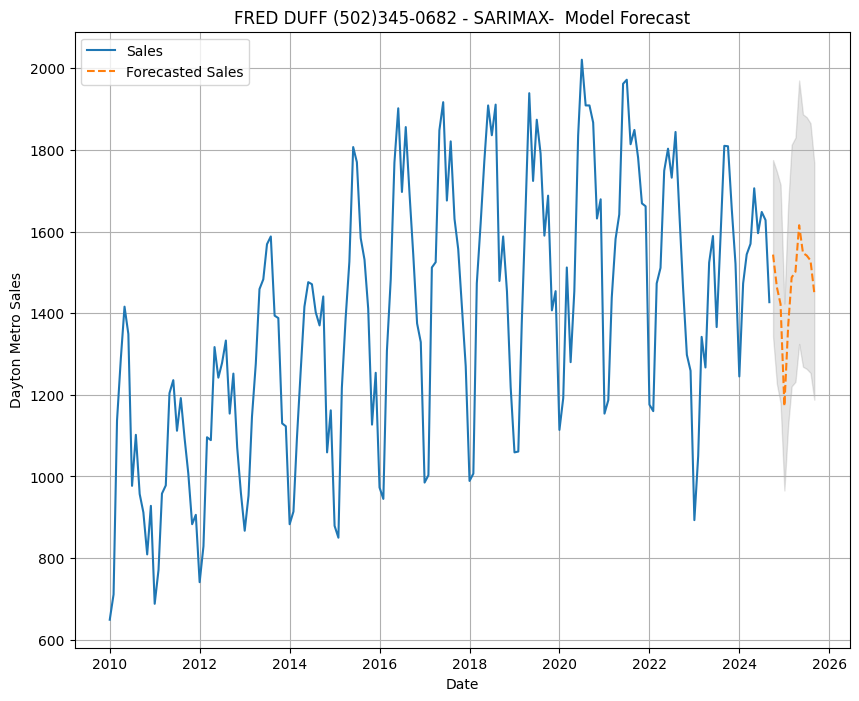

In [68]:
# Plot the forecast
plt.figure(figsize=(10, 8))
plt.plot(data.index, data['Sales'], label='Sales')
plt.plot(forecast_SARIMA_data.index, forecast_SARIMA_data['mean'], label='Forecasted Sales', linestyle='--')
plt.fill_between(forecast_SARIMA_data.index, forecast_SARIMA_data['mean_ci_lower'], forecast_SARIMA_data['mean_ci_upper'], color='k', alpha=0.10)
plt.title('FRED DUFF (502)345-0682 - SARIMAX-  Model Forecast')
plt.xlabel('Date')
plt.ylabel('Dayton Metro Sales')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
df.head()

Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                              
2010-01-01  12744.0   649.0  216.687        2174.0    66449036.0   
2010-02-01  12946.0   711.0  216.741        2143.0    75823695.0   
2010-03-01  13559.0  1137.0  217.631        3161.0   129276059.0   
2010-04-01  13892.0  1289.0  218.009        3106.0   147547380.0   
2010-05-01  14158.0  1416.0  218.178        2374.0   171784178.0   

            Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  
Month                                                                
2010-01-01            1969.0   5.0520             2.1          12.8  
2010-02-01            1792.0   4.9900             2.3          12.3  
2010-03-01            2142.0   4.9675             2.2          12.0  
2010-04-01            2060.0   5.0980             2.0          11.2  
2010-05-01            1899.0   4.8875             1.1          10.7

In [70]:
 df.tail()

Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                             
2024-05-01  5481.0  1706.0  314.069        2210.0   465743812.0   
2024-06-01  5418.0  1596.0  314.175        2021.0   437210832.0   
2024-07-01  5629.0  1648.0  314.180        2056.0   437549996.0   
2024-08-01  5581.0  1628.0  314.796        2068.0   439317040.0   
2024-09-01  5758.0  1427.0  315.301        1840.0   372544415.0   

            Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  
Month                                                                
2024-05-01            1668.0   7.0600             4.4           4.8  
2024-06-01            1706.0   6.9175             3.0           5.4  
2024-07-01            1705.0   6.8475             2.9           5.0  
2024-08-01            1696.0   6.5000             3.2           5.2  
2024-09-01            1871.0   6.1800             3.4           5.2

In [71]:
forecast_SARIMA_data['mean'].head()

2024-10-01    1543.526154
2024-11-01    1463.816243
2024-12-01    1422.187671
2025-01-01    1172.428161
2025-02-01    1369.893483
Freq: MS, Name: mean, dtype: float64

In [72]:
# Define the target variable and features
features = ['Active','CPI','New_Listings','Sales_Volume','Expired_Listings','30yrFRM', 'Inflation_Rate', 'Unemployment']
target = 'Sales'

# Normalize the data
# since we are using a MinMaxScaler , we are not going to utilize the log transformation
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Create sequences for time series forecasting
def create_sequences(df, seq_length):
    X, y = [], []
    for i in range(len(df) - seq_length):
        X.append(df[i:i+seq_length])
        y.append(df[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Using the past 12 months to predict the next month
X_train, y_train = create_sequences(train[features].values, seq_length)
X_test, y_test = create_sequences(test[features].values, seq_length)

y_train = train[target].values[seq_length:]
y_test = test[target].values[seq_length:]


In [73]:
# Build the DNN model
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_length, len(features))),  # Defines the input shape
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

dnn_model.compile(optimizer='adam', loss='mean_squared_error')
dnn_model.summary()

# Train the DNN model
history_dnn = dnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12, 64)              │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12, 32)              │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             385 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,041 (11.88 KB)

 Trainable params: 3,041 (11.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.6770 - val_loss: 0.5138
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3063 - val_loss: 0.1539
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1149 - val_loss: 0.0266
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0488 - val_loss: 0.0753
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0798 - val_loss: 0.1215
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0782 - val_loss: 0.0896
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0504 - val_loss: 0.0502
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0326 - val_loss: 0.0363
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0307 - val_loss: 0.0339
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - val_loss: 0.0402
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0238 - val_loss: 0.0734
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0192 - val_loss: 0.1201
Epoc

In [74]:
# Build the CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_length, len(features))),  # Defines the input shape
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, len(features))),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.summary()

# Train the CNN model
history_cnn = cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


C:\Users\Frederick Duff\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 64)              │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 4, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,345 (20.88 KB)

 Trainable params: 5,345 (20.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.1264 - val_loss: 0.0737
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0943 - val_loss: 0.0689
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0462 - val_loss: 0.0319
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0493 - val_loss: 0.0917
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0247 - val_loss: 0.2990
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0244 - val_loss: 0.2872
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0183 - val_loss: 0.1783
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0250 - val_loss: 0.1661
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0166 - val_loss: 0.2939
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0205 - val_loss: 0.2524
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0144 - val_loss: 0.1304
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0127 - val_loss: 0.1164
E

In [75]:
# Build the LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_length, len(features))),  # Defines the input shape
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(seq_length, len(features))),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()

# Train the LSTM model
history_lstm = lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


C:\Users\Frederick Duff\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 64)              │          18,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,137 (121.63 KB)

 Trainable params: 31,137 (121.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.2702 - val_loss: 0.0220
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0746 - val_loss: 0.0750
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0728 - val_loss: 0.0460
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0527 - val_loss: 0.0662
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0511 - val_loss: 0.1219
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0405 - val_loss: 0.1170
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0393 - val_loss: 0.1058
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0440 - val_loss: 0.1463
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - val_loss: 0.2111
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0340 - val_loss: 0.2653
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0324 - val_loss: 0.3350
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0306 - val_loss: 0.3836


In [76]:
# Build the CNN-LSTM hybrid model
cnn_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_length, len(features))),  # Defines the input shape
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, len(features))),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_lstm_model.summary()

# Train the CNN-LSTM hybrid model
history_cnn_lstm = cnn_lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 11, 64)              │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,561 (181.88 KB)

 Trainable params: 46,561 (181.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.2252 - val_loss: 0.0413
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0728 - val_loss: 0.1879
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0991 - val_loss: 0.1203
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0544 - val_loss: 0.0551
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0512 - val_loss: 0.0757
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0466 - val_loss: 0.1282
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0383 - val_loss: 0.2422
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0306 - val_loss: 0.4416
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0397 - val_loss: 0.3708
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0326 - val_loss: 0.2771
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0366 - val_loss: 0.4150
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0304 - val_loss: 0.2975
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0491
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1370
DNN Model MSE: 0.09966933727264404
CNN Model MSE: 0.10582918673753738
LSTM Model MSE: 0.04910895228385925
CNN-LSTM Model MSE: 0.13695503771305084


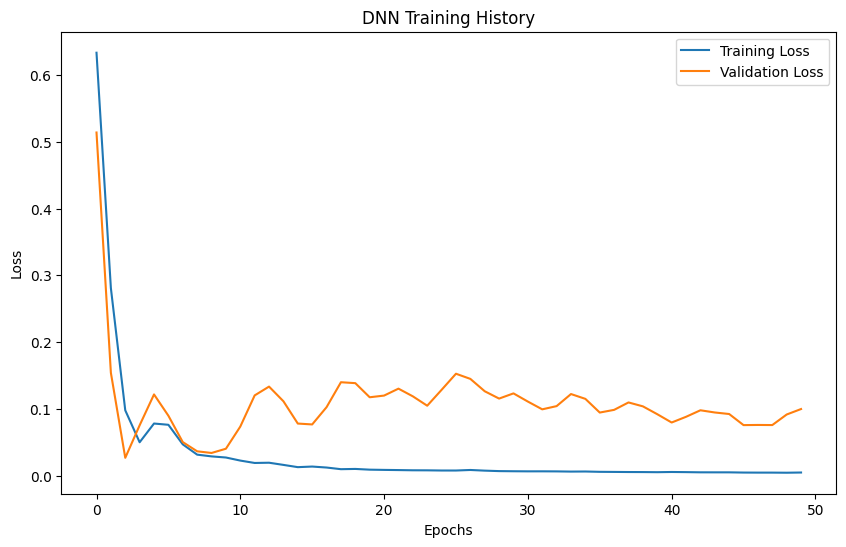

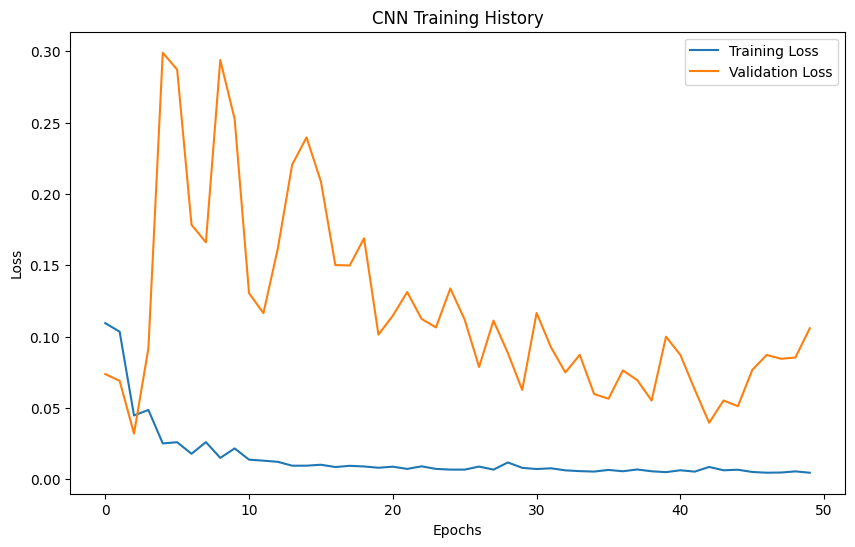

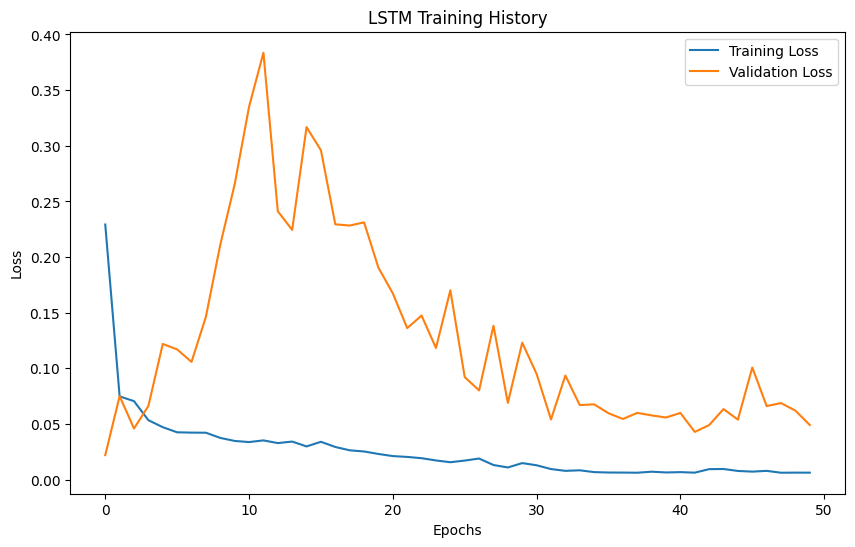

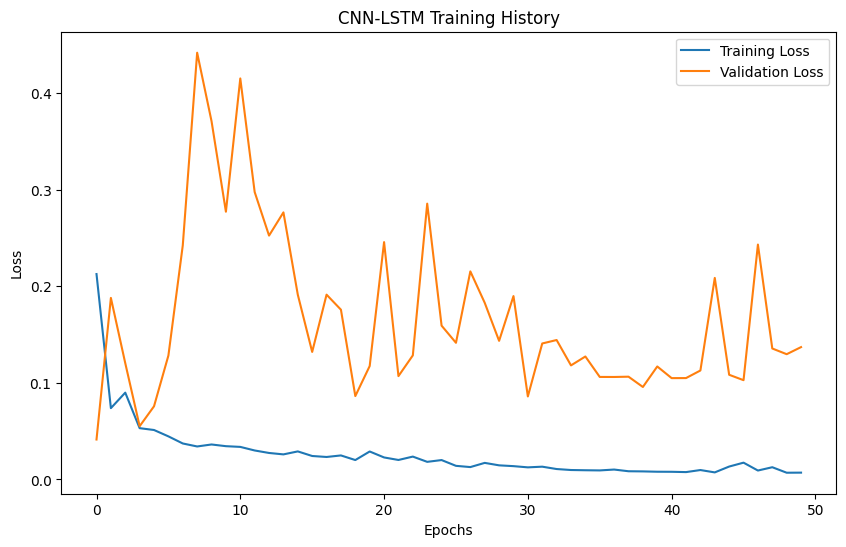

In [77]:
# Evaluate the models
dnn_mse = dnn_model.evaluate(X_test, y_test)
cnn_mse = cnn_model.evaluate(X_test, y_test)
lstm_mse = lstm_model.evaluate(X_test, y_test)
cnn_lstm_mse = cnn_lstm_model.evaluate(X_test, y_test)

print(f"DNN Model MSE: {dnn_mse}")
print(f"CNN Model MSE: {cnn_mse}")
print(f"LSTM Model MSE: {lstm_mse}")
print(f"CNN-LSTM Model MSE: {cnn_lstm_mse}")

# Plot the training history
def plot_history(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history_dnn, 'DNN Training History')
plot_history(history_cnn, 'CNN Training History')
plot_history(history_lstm, 'LSTM Training History')
plot_history(history_cnn_lstm, 'CNN-LSTM Training History')


In [78]:
# Create a dictionary to store the MSE values with corresponding model names
mse_values = {
    "DNN": dnn_mse,
    "CNN": cnn_mse,
    "LSTM": lstm_mse,
    "CNN-LSTM": cnn_lstm_mse
}

# Find the model with the lowest MSE
best_model_name = min(mse_values, key=mse_values.get)
best_mse = mse_values[best_model_name]

# Select the corresponding model object
if best_model_name == "DNN":
    best_model = dnn_model
elif best_model_name == "CNN":
    best_model = cnn_model
elif best_model_name == "LSTM":
    best_model = lstm_model
elif best_model_name == "CNN-LSTM":
    best_model = cnn_lstm_model

print(f"The best model is: {best_model_name} with an MSE of {best_mse}")

The best model is: LSTM with an MSE of 0.04910895228385925


In [79]:
# the best model was a DNN model - however there are concerns about overfitting so we will go with the CNN_LSTM 
# which is known to be robust on seasonal and trend forecasting

In [80]:
# using the CNN_LSTM model due to concerns of overfitting- 

In [81]:
best_model = cnn_lstm_model

In [82]:
def forecast_with_model(model, X, n_forecasts):
    forecast = []
    current_batch = X[-1].reshape((1, seq_length, len(features)))
    
    for _ in range(n_forecasts):
        current_pred = model.predict(current_batch)[0]
        current_pred = current_pred.flatten()[0]  # Ensure it's a scalar
        forecast.append(current_pred)
        
        # Reshape current_pred into a 3D array with shape (1, 1, len(features))
        current_pred_reshaped = np.zeros((1, 1, len(features)))
        current_pred_reshaped[0, 0, 0] = current_pred  # Only set the first feature
        
        # Append the prediction to the current batch
        current_batch = np.append(current_batch[:, 1:, :], current_pred_reshaped, axis=1)
    
    return np.array(forecast).flatten()


In [83]:
def forecast_with_model(model, X, n_forecasts):
    forecast = []
    current_batch = X[-1].reshape((1, seq_length, len(features)))
    
    for _ in range(n_forecasts):
        current_pred = model.predict(current_batch)[0]
        forecast.append(current_pred)
        current_pred_reshaped = np.zeros((1, 1, len(features)))
        current_pred_reshaped[0, 0, 0] = current_pred
        current_batch = np.append(current_batch[:, 1:, :], current_pred_reshaped, axis=1)
    
    return np.array(forecast).flatten()

In [84]:
# Forecast future values
n_forecasts = 12  # For 12 future steps (12 months)
future_forecasts_scaled = forecast_with_model(best_model, X_test, n_forecasts)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [85]:
# Create a DataFrame for the scaled forecasts
future_forecast_scaled_df = pd.DataFrame(future_forecasts_scaled, columns=['Forecast'])

In [86]:
# Create a DataFrame with the same structure as the original scaled data
dummy_data = pd.DataFrame(columns=data_scaled.columns)

In [87]:
# Assign the scaled forecast values to the 'Sales' column
dummy_data['Sales'] = future_forecast_scaled_df['Forecast']

In [88]:
# Fill other columns with zero since they are not being transformed
for col in dummy_data.columns:
    if col != 'Sales':
        dummy_data[col] = 0


In [89]:
# Inverse transform using the scaler
inverse_transformed = scaler.inverse_transform(dummy_data)

In [90]:
# Extract the 'Sales' column from the inverse transformed data
future_forecast_df = pd.DataFrame(inverse_transformed, index=future_forecast_scaled_df.index, columns=data_scaled.columns)
future_forecast_df = future_forecast_df[['Sales']]

In [91]:
print(future_forecast_df)

          Sales
0   1943.933061
1   1961.476558
2   1977.316138
3   1777.395896
4   1708.474903
5   1654.278452
6   1622.137086
7   1556.149699
8   1526.932127
9   1451.690381
10  1403.425748
11  1323.703819


In [92]:
# Make sure future_forecast_df has the correct index
future_forecast_df.index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=len(future_forecast_df), freq='MS')

# Combine the original sales data with the forecasted sales data
combined_df = pd.concat([data[['Sales']], future_forecast_df])

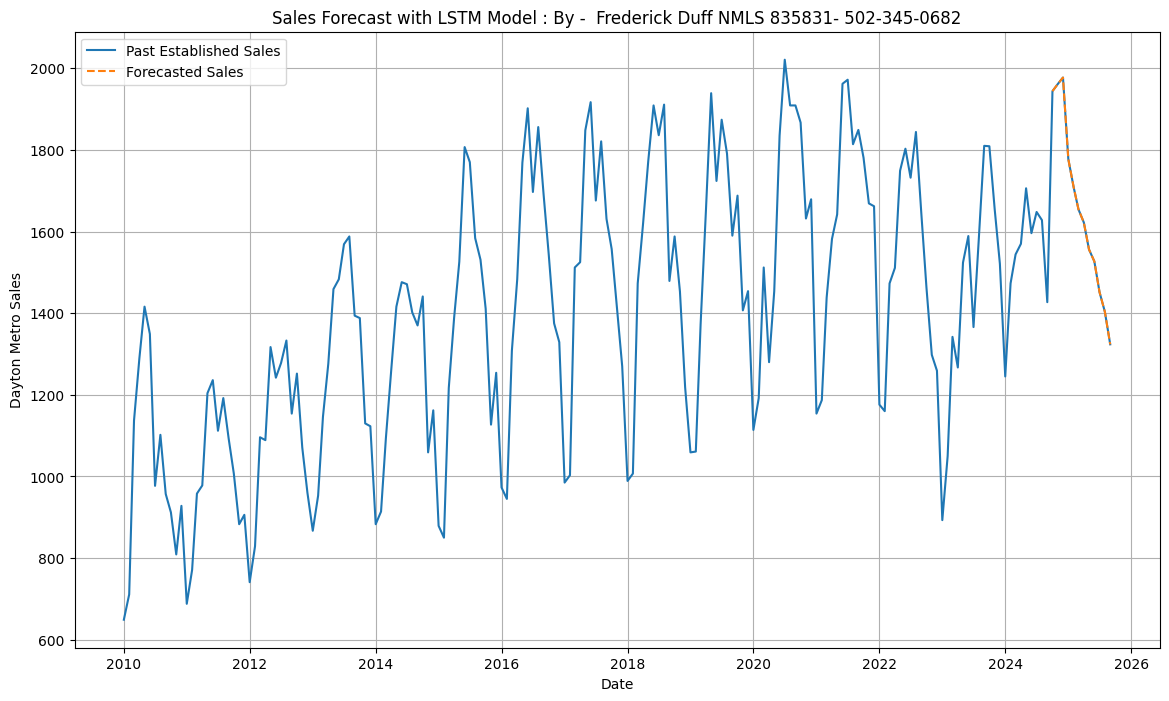

In [93]:
# Plot the original and forecasted sales
plt.figure(figsize=(14, 8))
plt.plot(combined_df.index, combined_df['Sales'], label='Past Established Sales')
plt.plot(future_forecast_df.index, future_forecast_df['Sales'], label='Forecasted Sales', linestyle='--')
plt.title(f'Sales Forecast with {best_model_name} Model : By -  Frederick Duff NMLS 835831- 502-345-0682')
plt.xlabel('Date')
plt.ylabel('Dayton Metro Sales')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
import matplotlib.image as mpimg
background_image = mpimg.imread('Dayton.jpg')

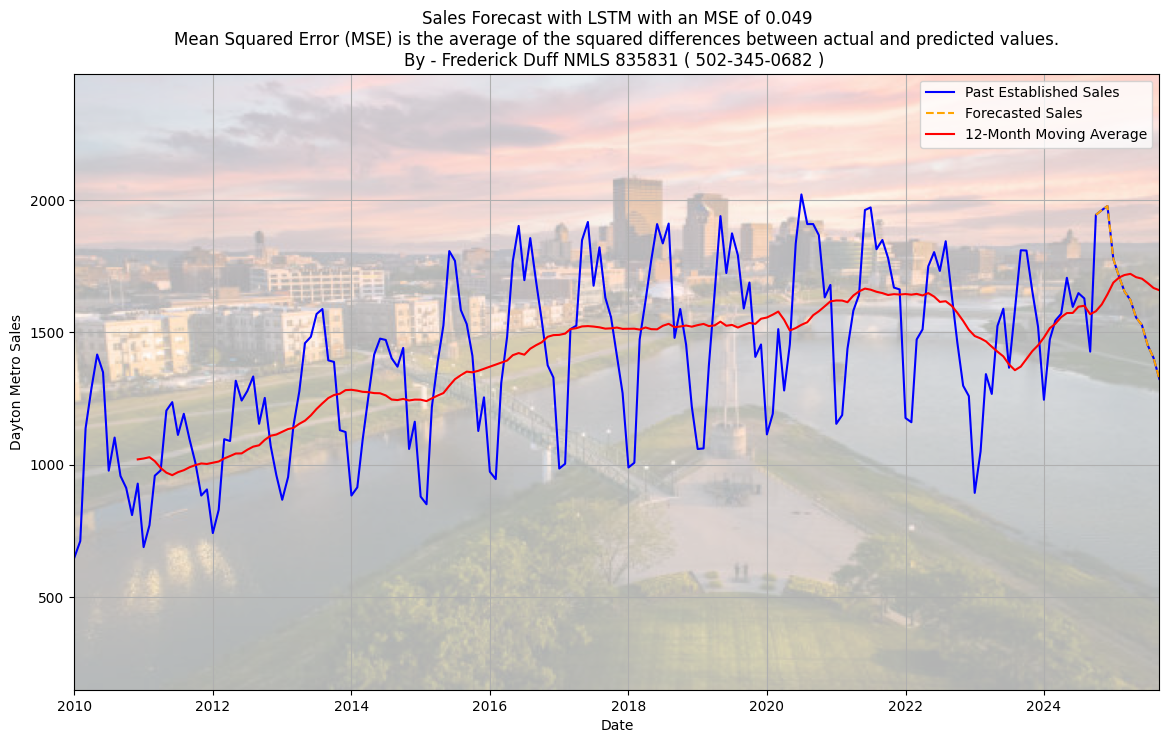

In [95]:
# Plot the original and forecasted sales with a background image
fig, ax = plt.subplots(figsize=(14, 8))

# Calculate moving average (e.g., 12-month moving average)
combined_df['Moving_Avg'] = combined_df['Sales'].rolling(window=12).mean()

# Display the background image with transparency, moved up a bit
image_extent = [combined_df.index.min(), future_forecast_df.index.max(), combined_df['Sales'].min() - 500, future_forecast_df['Sales'].max() + 500]
ax.imshow(background_image, extent=image_extent, aspect='auto', alpha=0.3)

# Plot the data on top of the image
ax.plot(combined_df.index, combined_df['Sales'], label='Past Established Sales', color = 'blue')
ax.plot(future_forecast_df.index, future_forecast_df['Sales'], label='Forecasted Sales', linestyle='--',color = 'orange')

# Plot the moving average
ax.plot(combined_df.index, combined_df['Moving_Avg'], label='12-Month Moving Average', color='red')

# Customize the plot
ax.set_title(f"Sales Forecast with {best_model_name} with an MSE of {best_mse:.3f}\n"
          "Mean Squared Error (MSE) is the average of the squared differences between actual and predicted values.\n"
          "By - Frederick Duff NMLS 835831 ( 502-345-0682 ) ")
ax.set_xlabel('Date')
ax.set_ylabel('Dayton Metro Sales')
ax.legend()
ax.grid(True)

plt.show()

In [96]:
future_forecast_df['Sales'].head(12)

2024-10-01    1943.933061
2024-11-01    1961.476558
2024-12-01    1977.316138
2025-01-01    1777.395896
2025-02-01    1708.474903
2025-03-01    1654.278452
2025-04-01    1622.137086
2025-05-01    1556.149699
2025-06-01    1526.932127
2025-07-01    1451.690381
2025-08-01    1403.425748
2025-09-01    1323.703819
Freq: MS, Name: Sales, dtype: float64

In [97]:
data['Sales'].tail(12)

Month
2023-10-01    1809.0
2023-11-01    1654.0
2023-12-01    1521.0
2024-01-01    1245.0
2024-02-01    1473.0
2024-03-01    1544.0
2024-04-01    1570.0
2024-05-01    1706.0
2024-06-01    1596.0
2024-07-01    1648.0
2024-08-01    1628.0
2024-09-01    1427.0
Freq: MS, Name: Sales, dtype: float64

### ACTIVE LISTINGS USING META's Open source PROPHET MODEL

In [98]:
from prophet import Prophet

In [99]:
# Initialize the model
model = Prophet()

In [100]:
# Display the dataframe to verify columns
df.head()

Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                              
2010-01-01  12744.0   649.0  216.687        2174.0    66449036.0   
2010-02-01  12946.0   711.0  216.741        2143.0    75823695.0   
2010-03-01  13559.0  1137.0  217.631        3161.0   129276059.0   
2010-04-01  13892.0  1289.0  218.009        3106.0   147547380.0   
2010-05-01  14158.0  1416.0  218.178        2374.0   171784178.0   

            Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  
Month                                                                
2010-01-01            1969.0   5.0520             2.1          12.8  
2010-02-01            1792.0   4.9900             2.3          12.3  
2010-03-01            2142.0   4.9675             2.2          12.0  
2010-04-01            2060.0   5.0980             2.0          11.2  
2010-05-01            1899.0   4.8875             1.1          10.7

In [101]:
df2 = df.copy()

In [102]:
# Reset the index to turn 'Month' into a column
df.reset_index(inplace=True)

In [103]:
# Convert 'Month' column to datetime with the specified format
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d')

# Rename columns to fit Prophet's requirements
df.rename(columns={'Month': 'ds'}, inplace=True)

# Convert 'ds' column to the desired format
df['ds'] = df['ds'].dt.strftime('%d-%m-%Y %H:%M')

# Convert 'ds' column back to datetime
df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y %H:%M')

In [104]:
# Convert the 'ds' column to datetime
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')

In [105]:
# Convert 'Month' column to datetime with the specified format
# df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d')

# Rename columns to fit Prophet's requirements
# df.rename(columns={'Month': 'ds'}, inplace=True)

# Convert 'ds' column to the desired format
df['ds'] = df['ds'].dt.strftime('%d-%m-%Y %H:%M')

# Convert 'ds' column back to datetime
df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y %H:%M')

In [106]:
# rename Active Column to y to fit prophet's requirements
df.rename(columns={'Active': 'y'}, inplace=True)

In [107]:
df.head()

ds        y   Sales      CPI  New_Listings  Sales_Volume  \
0 2010-01-01  12744.0   649.0  216.687        2174.0    66449036.0   
1 2010-02-01  12946.0   711.0  216.741        2143.0    75823695.0   
2 2010-03-01  13559.0  1137.0  217.631        3161.0   129276059.0   
3 2010-04-01  13892.0  1289.0  218.009        3106.0   147547380.0   
4 2010-05-01  14158.0  1416.0  218.178        2374.0   171784178.0   

   Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  
0            1969.0   5.0520             2.1          12.8  
1            1792.0   4.9900             2.3          12.3  
2            2142.0   4.9675             2.2          12.0  
3            2060.0   5.0980             2.0          11.2  
4            1899.0   4.8875             1.1          10.7

In [108]:
# Fit the model to the data
model.fit(df)

17:15:18 - cmdstanpy - INFO - Chain [1] start processing
17:15:18 - cmdstanpy - INFO - Chain [1] done processing


In [109]:
# Create a dataframe with future dates
future = model.make_future_dataframe(periods=12, freq='M')

In [110]:
# Make predictions
forecast = model.predict(future)

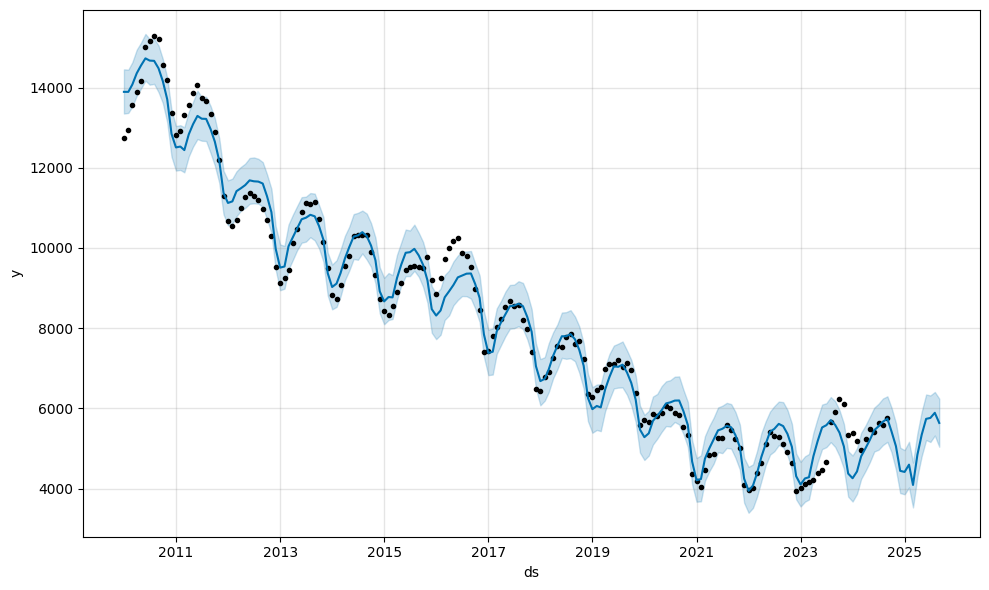

In [111]:
# Plot the forecast
fig = model.plot(forecast)

### ACTIVE LISTING SARIMA FORECAST

In [112]:
df2.head()

Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                              
2010-01-01  12744.0   649.0  216.687        2174.0    66449036.0   
2010-02-01  12946.0   711.0  216.741        2143.0    75823695.0   
2010-03-01  13559.0  1137.0  217.631        3161.0   129276059.0   
2010-04-01  13892.0  1289.0  218.009        3106.0   147547380.0   
2010-05-01  14158.0  1416.0  218.178        2374.0   171784178.0   

            Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  
Month                                                                
2010-01-01            1969.0   5.0520             2.1          12.8  
2010-02-01            1792.0   4.9900             2.3          12.3  
2010-03-01            2142.0   4.9675             2.2          12.0  
2010-04-01            2060.0   5.0980             2.0          11.2  
2010-05-01            1899.0   4.8875             1.1          10.7

In [113]:
# Define the endogenous and exogenous variables
endog = df2['Active']
exog = df2[['Sales', 'CPI', '30yrFRM', 'Inflation_Rate', 'Unemployment']]

In [114]:
# Use auto_arima to find the best SARIMAX parameters
auto_arima_model = pm.auto_arima(endog, exogenous=exog, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2429.862, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2585.014, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2448.837, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2486.599, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2585.028, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2454.864, Time=0.51 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2448.454, Time=0.52 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2426.940, Time=1.24 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2449.574, Time=1.11 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=2453.198, Time=1.21 sec
 ARIMA(2,1,3)(1,0,2)[12] intercept   : 

In [115]:
# Fit SARIMAX model
p, d, q = auto_arima_model.order
P, D, Q, s = auto_arima_model.seasonal_order
sarimax_model = SARIMAX(endog, exog=exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_result = sarimax_model.fit(disp=False)
print(sarimax_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Active   No. Observations:                  177
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1191.423
Date:                            Thu, 10 Oct 2024   AIC                           2408.845
Time:                                    17:15:39   BIC                           2450.062
Sample:                                01-01-2010   HQIC                          2425.563
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Sales              0.3612      0.150      2.412      0.016       0.068       0.655
CPI               74.30

C:\Users\Frederick Duff\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [116]:
# Forecast future values
forecast_steps = 12
exog_forecast = exog[-forecast_steps:]
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_Active_data = forecast.summary_frame()
forecast_Active_data.index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

In [117]:
# Print forecasted values
print("Forecasted Values:\n", forecast_Active_data)

Forecasted Values:
 Active             mean     mean_se  mean_ci_lower  mean_ci_upper
2024-10-01  5354.185287  202.944548    4956.421283    5751.949291
2024-11-01  5188.395836  292.612536    4614.885805    5761.905868
2024-12-01  4511.341031  367.402445    3791.245471    5231.436591
2025-01-01  4426.981501  435.536031    3573.346568    5280.616435
2025-02-01  4466.352087  498.526019    3489.259045    5443.445129
2025-03-01  4437.985312  555.912562    3348.416711    5527.553912
2025-04-01  4526.744831  606.752178    3337.532415    5715.957247
2025-05-01  4604.376515  650.594212    3329.235290    5879.517739
2025-06-01  4526.130759  687.856812    3177.956181    5874.305336
2025-07-01  4613.267791  719.774091    3202.536495    6023.999086
2025-08-01  4825.763648  748.091495    3359.531260    6291.996036
2025-09-01  4927.816755  774.706787    3409.419355    6446.214156


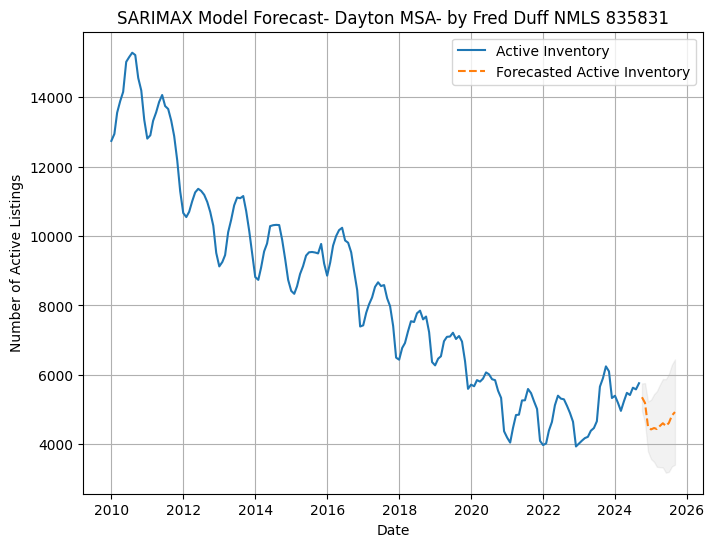

In [118]:
# Plot the forecast
plt.figure(figsize=(8, 6))
plt.plot(df2.index, df2['Active'], label='Active Inventory')
plt.plot(forecast_Active_data.index, forecast_Active_data['mean'], label='Forecasted Active Inventory', linestyle='--')
plt.fill_between(forecast_Active_data.index, forecast_Active_data['mean_ci_lower'], forecast_Active_data['mean_ci_upper'], color='k', alpha=0.05)
plt.title('SARIMAX Model Forecast- Dayton MSA- by Fred Duff NMLS 835831')
plt.xlabel('Date')
plt.ylabel('Number of Active Listings')
plt.legend()
plt.grid(True)
plt.show()


In [119]:
df2['Moving_Avg'] = df2['Active'].rolling(window=12).mean()


In [120]:
# import the image for the plot
background_image2 = mpimg.imread('Dayton.jpg')

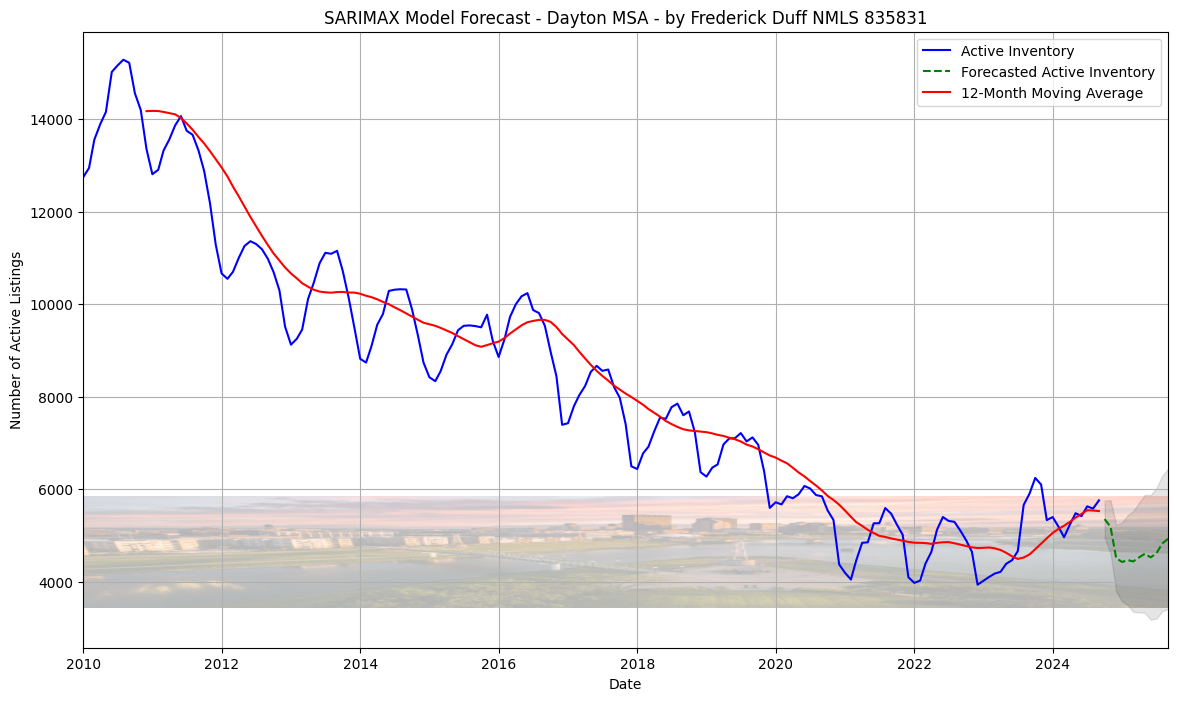

In [121]:
# Plot the original and forecasted Active Inventory with a background image
fig, ax = plt.subplots(figsize=(14, 8))

# Display the background image with transparency, moved up a bit
image_extent = [df2.index.min(), forecast_Active_data.index.max(), df2['Active'].min() - 500, forecast_Active_data['mean'].max() + 500]
ax.imshow(background_image2, aspect='auto',extent=image_extent, alpha=0.3)

# Plot the data on top of the image
ax.plot(df2.index, df2['Active'], label='Active Inventory', color='blue')
ax.plot(forecast_Active_data.index, forecast_Active_data['mean'], label='Forecasted Active Inventory', linestyle='--', color='green')

# Plot the moving average
ax.plot(df2.index, df2['Moving_Avg'], label='12-Month Moving Average', color='red')


# Plot the confidence intervals
ax.fill_between(forecast_Active_data.index, forecast_Active_data['mean_ci_lower'], forecast_Active_data['mean_ci_upper'], color='k', alpha=0.1)

# Customize the plot
ax.set_title('SARIMAX Model Forecast - Dayton MSA - by Frederick Duff NMLS 835831')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Active Listings')
ax.legend()
ax.grid(True)


plt.show()


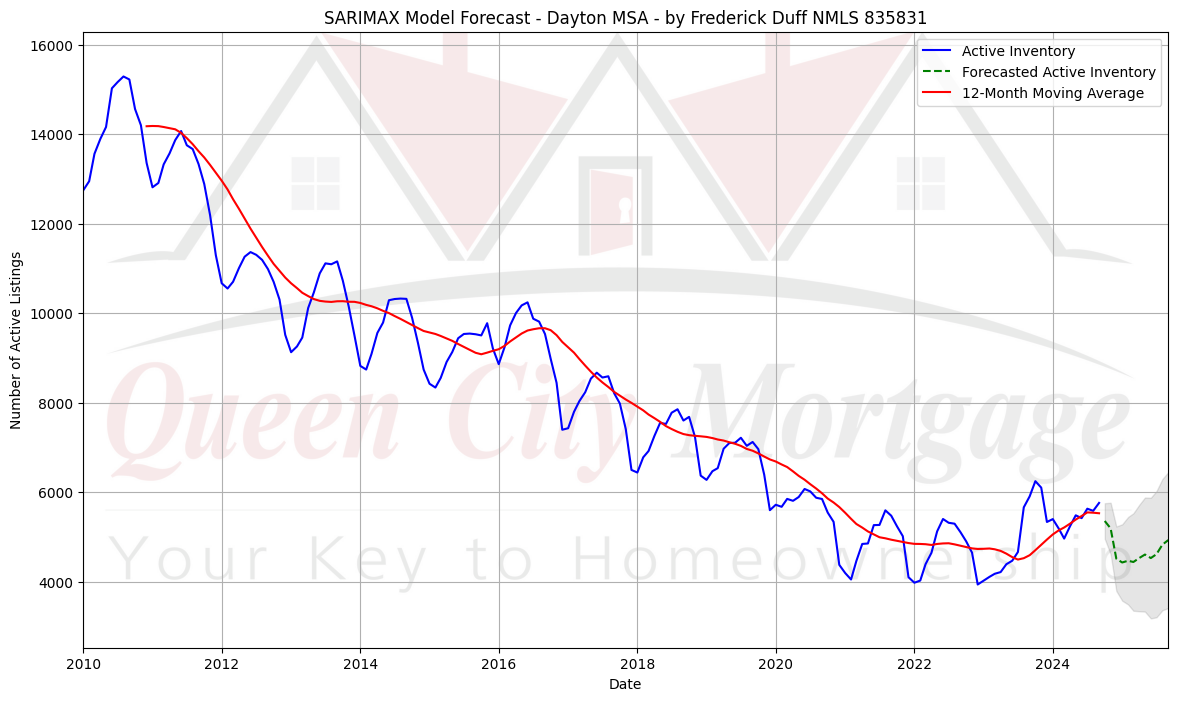

In [122]:
# Calculate a moving average (e.g., 12-month moving average) for Active Inventory
df2['Moving_Avg'] = df2['Active'].rolling(window=12).mean()

# Load the background image
background_image2 = mpimg.imread('qcm_logo.jpg')

# Plot the original and forecasted Active Inventory with a background image
fig, ax = plt.subplots(figsize=(14, 8))

# Adjust the extent to better fit the image
y_min = df2['Active'].min() - 500
y_max = df2['Active'].max() + 1000  # Adjust as needed
x_min = df2.index.min()
x_max = forecast_Active_data.index.max()

# Display the background image with transparency, moved up a bit
image_extent = [x_min, x_max, y_min, y_max]
ax.imshow(background_image2, extent=image_extent, aspect='auto', alpha=0.1)

# Plot the data on top of the image
ax.plot(df2.index, df2['Active'], label='Active Inventory', color='blue')
ax.plot(forecast_Active_data.index, forecast_Active_data['mean'], label='Forecasted Active Inventory', linestyle='--', color='green')

# Plot the moving average
ax.plot(df2.index, df2['Moving_Avg'], label='12-Month Moving Average', color='red')

# Plot the confidence intervals
ax.fill_between(forecast_Active_data.index, forecast_Active_data['mean_ci_lower'], forecast_Active_data['mean_ci_upper'], color='k', alpha=0.1)

# Customize the plot
ax.set_title('SARIMAX Model Forecast - Dayton MSA - by Frederick Duff NMLS 835831')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Active Listings')
ax.legend()
ax.grid(True)

plt.show()


## DISPARITY BETWEEN ACTIVE LISTINGS AND SALES

In [123]:
# Calculate the disparity between active listings and sales
df2['Disparity'] = df2['Active'] - df2['Sales']


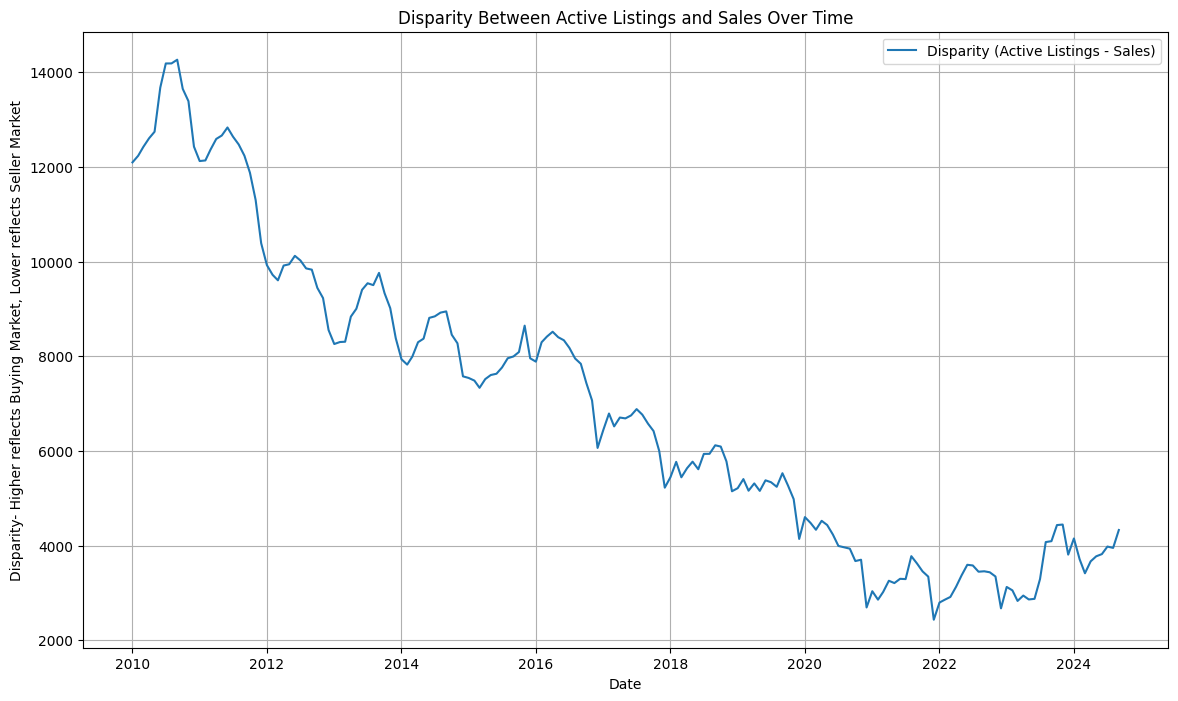

In [124]:
# Plot the disparity between active listings and sales
plt.figure(figsize=(14, 8))
plt.plot(df2.index, df2['Disparity'], label='Disparity (Active Listings - Sales)')
plt.title('Disparity Between Active Listings and Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Disparity- Higher reflects Buying Market, Lower reflects Seller Market')
plt.legend()
plt.grid(True)
plt.show()


            Active   Sales  Disparity%  Disparity_MA
Month                                               
2023-10-01  6244.0  1809.0   71.028187     70.237279
2023-11-01  6100.0  1654.0   72.885246     70.305382
2023-12-01  5332.0  1521.0   71.474119     70.594469
2024-01-01  5397.0  1245.0   76.931629     70.522805
2024-02-01  5187.0  1473.0   71.602082     70.287340
2024-03-01  4961.0  1544.0   68.877242     70.372419
2024-04-01  5239.0  1570.0   70.032449     70.381255
2024-05-01  5481.0  1706.0   68.874293     70.681703
2024-06-01  5418.0  1596.0   70.542636     71.191918
2024-07-01  5629.0  1648.0   70.723041     71.194422
2024-08-01  5581.0  1628.0   70.829600     71.095711
2024-09-01  5758.0  1427.0   75.217089     71.584801


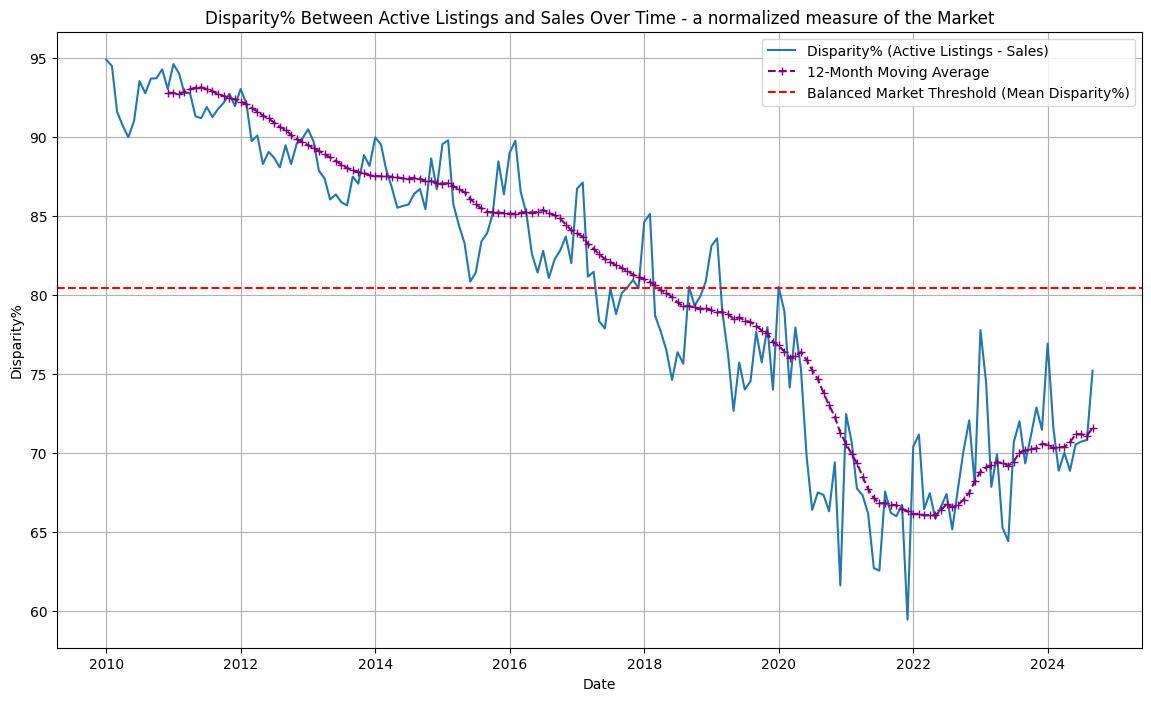

Statistical Summary of Disparity as a percentage since Jan 2010:
count    177.000000
mean      80.426170
std        9.189564
min       59.443631
25%       72.014134
50%       81.425781
75%       88.303730
max       94.907407
Name: Disparity%, dtype: float64


In [125]:
# Calculate Disparity%
df2['Disparity%'] = ((df2['Active'] - df2['Sales']) / df2['Active']) * 100

# Calculate the mean of Disparity%
mean_disparity = df2['Disparity%'].mean()

# Calculate the 12-month moving average for Disparity%
df2['Disparity_MA'] = df2['Disparity%'].rolling(window=12).mean()

# Print the first few rows to verify
print(df2[['Active', 'Sales', 'Disparity%', 'Disparity_MA']].tail(12))

# Plot the Disparity%
plt.figure(figsize=(14, 8))
plt.plot(df2.index, df2['Disparity%'], label='Disparity% (Active Listings - Sales)')
plt.plot(df2.index, df2['Disparity_MA'], label='12-Month Moving Average', linestyle='--', marker='+', color='purple')
plt.axhline(mean_disparity, color='red', linestyle='--', label='Balanced Market Threshold (Mean Disparity%)')
plt.title('Disparity% Between Active Listings and Sales Over Time - a normalized measure of the Market')
plt.xlabel('Date')
plt.ylabel('Disparity%')
plt.legend()
plt.grid(True)
plt.show()

# Statistical Summary
print('Statistical Summary of Disparity as a percentage since Jan 2010:')
print(df2['Disparity%'].describe())

In [126]:
df2.tail(24)

Active   Sales      CPI  New_Listings  Sales_Volume  \
Month                                                             
2022-10-01  4901.0  1463.0  298.012        1696.0   333401343.0   
2022-11-01  4647.0  1298.0  297.711        1381.0   272092271.0   
2022-12-01  3935.0  1259.0  296.797         999.0   276581113.0   
2023-01-01  4021.0   893.0  299.170        1248.0   189778368.0   
2023-02-01  4106.0  1050.0  300.840        1271.0   224704219.0   
2023-03-01  4175.0  1342.0  301.836        1648.0   302930490.0   
2023-04-01  4213.0  1267.0  303.363        1571.0   297389459.0   
2023-05-01  4388.0  1524.0  304.127        1751.0   372631392.0   
2023-06-01  4466.0  1589.0  305.109        1793.0   394415019.0   
2023-07-01  4661.0  1366.0  305.691        1841.0   342838281.0   
2023-08-01  5660.0  1584.0  307.026        2827.0   386044691.0   
2023-09-01  5905.0  1810.0  307.789        2472.0   446680326.0   
2023-10-01  6244.0  1809.0  307.671        2353.0   475762391.0   
2023-11-01  6100.0  1654.0  307.051        1917.0   431906637.0   
2023-12-01  5332.0  1521.0  306.746        1300.0   381862880.0   
2024-01-01  5397.0  1245.0  308.417        1677.0   299433366.0   
2024-02-01  5187.0  1473.0  310.326        1627.0   367358899.0   
2024-03-01  4961.0  1544.0  312.332        1791.0   398771763.0   
2024-04-01  5239.0  1570.0  313.548        2045.0   397564750.0   
2024-05-01  5481.0  1706.0  314.069        2210.0   465743812.0   
2024-06-01  5418.0  1596.0  314.175        2021.0   437210832.0   
2024-07-01  5629.0  1648.0  314.180        2056.0   437549996.0   
2024-08-01  5581.0  1628.0  314.796        2068.0   439317040.0   
2024-09-01  5758.0  1427.0  315.301        1840.0   372544415.0   

            Expired_Listings  30yrFRM  Inflation_Rate  Unemployment  \
Month                                                                 
2022-10-01            2012.0   6.9000             7.1           3.8   
2022-11-01            1970.0   6.8050             6.5           3.5   
2022-12-01            3099.0   6.3640             8.0           3.4   
2023-01-01            1648.0   6.2725             6.0           4.1   
2023-02-01            1497.0   6.2575             5.0           4.0   
2023-03-01            1524.0   6.5440             4.9           3.8   
2023-04-01            1404.0   6.3425             4.0           3.2   
2023-05-01            1300.0   6.4250             3.0           3.4   
2023-06-01            1320.0   6.7140             3.2           3.8   
2023-07-01            1328.0   6.8400             3.7           3.7   
2023-08-01            1514.0   7.0720             3.7           3.8   
2023-09-01            1664.0   7.2000             3.2           3.6   
2023-10-01            1713.0   7.6200             3.1           3.5   
2023-11-01            1831.0   7.4420             3.4           3.2   
2023-12-01            2998.0   6.8150             4.1           3.1   
2024-01-01            1686.0   6.6425             3.2           4.0   
2024-02-01            2010.0   6.7760             3.5           4.3   
2024-03-01            2049.0   6.8200             3.4           4.4   
2024-04-01            1835.0   6.9925             3.4           4.3   
2024-05-01            1668.0   7.0600             4.4           4.8   
2024-06-01            1706.0   6.9175             3.0           5.4   
2024-07-01            1705.0   6.8475             2.9           5.0   
2024-08-01            1696.0   6.5000             3.2           5.2   
2024-09-01            1871.0   6.1800             3.4           5.2   

             Moving_Avg  Disparity  Disparity%  Disparity_MA  
Month                                                         
2022-10-01  4773.250000     3438.0   70.148949     67.048862  
2022-11-01  4742.583333     3349.0   72.068001     67.494542  
2022-12-01  4729.000000     2676.0   68.005083     68.207996  
2023-01-01  4732.833333     3128.0   77.791594     68.822704  
2023-02-01  4739.750000     3056.0   74.4276

- The disparity between active listings and sales in a real estate market can provide several insights into market dynamics and   conditions:
* 1.	Market Balance:
   o	Seller's Market: If active listings are low relative to sales, it indicates high demand and low supply, leading to a           seller's market. In such a market, homes sell quickly, often at or above the asking price.
   o	Buyer's Market: If active listings are high relative to sales, it indicates high supply and low demand, leading to a           buyer's market. In such a market, buyers have more choices and can negotiate lower prices.
* 2.	    Market Liquidity:
   o	A low disparity (i.e., active listings close to sales) suggests a liquid market where properties are moving quickly.
   o	A high disparity indicates less liquidity, meaning properties stay on the market longer.
* 3.	Price Trends:
   o	A high number of active listings with stagnant or declining sales can lead to downward pressure on prices as sellers           compete to attract buyers.
   o	Conversely, low inventory with high sales can drive prices up due to competition among buyers.
* 4.	Economic Indicators:
   o	The disparity can reflect broader economic conditions. For example, economic downturns might see a rise in active               listings (as more people need to sell) but a drop in sales (as fewer people can afford to buy).
   o	Economic growth periods might see the opposite, with fewer active listings and higher sales.
* 5.	Market Sentiment:
   o	A growing disparity where listings outpace sales could indicate increasing seller pessimism or decreasing buyer                 confidence.
   o	A shrinking disparity could signal growing confidence among buyers or fewer sellers willing to list their properties,           expecting higher future prices.


In [127]:
df2['Disparity'].describe()

count      177.000000
mean      6929.943503
std       3135.887948
min       2436.000000
25%       3994.000000
50%       6688.000000
75%       8843.000000
max      14263.000000
Name: Disparity, dtype: float64

In [128]:
df2['Disparity%'].describe()

count    177.000000
mean      80.426170
std        9.189564
min       59.443631
25%       72.014134
50%       81.425781
75%       88.303730
max       94.907407
Name: Disparity%, dtype: float64

## Year over Year Estimated Difference in Sales by Models

In [129]:
# Year over Year forecasted difference in sales 

In [130]:
forecastVAR_data = forecast_df

In [131]:
forecastVAR_data.head()

Active    Sales  New_Listings  Expired_Listings  30yrFRM  Inflation_Rate  \
0  5804.44  1402.95       1877.68           1784.46     6.18            3.48   
1  5878.39  1420.89       1919.19           1767.51     6.19            3.56   
2  5956.94  1442.51       1944.93           1772.60     6.19            3.61   
3  6030.20  1457.33       1955.39           1786.50     6.19            3.63   
4  6094.75  1463.13       1955.50           1802.34     6.19            3.62   

   Unemployment  
0          5.16  
1          5.10  
2          5.03  
3          4.97  
4          4.93

In [132]:
# Ensure the last 12 months of data['Sales'] and first 12 months of forecast_SARIMA_data['mean'] align properly
past_sales = data['Sales'].tail(12).reset_index(drop=True)
future_sales3 = forecast_SARIMA_data['mean'].head(12).reset_index(drop=True)

# Calculate the difference
SARIMAdeltasales = future_sales3 - past_sales

# Create a DataFrame to display the differences with corresponding dates
SARIMAdeltasales_df = pd.DataFrame({
    'Date': future_forecast_df.index[:12],
    'SARIMASales': SARIMAdeltasales
})

In [133]:
# Ensure the last 12 months of data['Sales'] and first 12 months of forecastVAR_data['Sales'] align properly
past_sales = data['Sales'].tail(12).reset_index(drop=True)
future_sales2 = forecastVAR_data['Sales'].head(12).reset_index(drop=True)

# Calculate the difference
VARdeltasales = future_sales2 - past_sales

# Create a DataFrame to display the differences with corresponding dates
VARdeltasales_df = pd.DataFrame({
    'Date': future_forecast_df.index[:12],
    'VARSales': VARdeltasales
})

In [134]:
future_forecast_df['Sales'].head(12)

2024-10-01    1943.933061
2024-11-01    1961.476558
2024-12-01    1977.316138
2025-01-01    1777.395896
2025-02-01    1708.474903
2025-03-01    1654.278452
2025-04-01    1622.137086
2025-05-01    1556.149699
2025-06-01    1526.932127
2025-07-01    1451.690381
2025-08-01    1403.425748
2025-09-01    1323.703819
Freq: MS, Name: Sales, dtype: float64

In [135]:
# Ensure the last 12 months of data['Sales'] and first 12 months of future_forecast_df['Sales'] align properly
past_sales = df2['Sales'].tail(12).reset_index(drop=True)
future_sales = future_forecast_df['Sales'].head(12).reset_index(drop=True)

# Calculate the difference
cnndeltasales = future_sales - past_sales

# Create a DataFrame to display the differences with corresponding dates
cnndeltasales_df = pd.DataFrame({
    'Date': future_forecast_df.index[:12],
    'CNNSales': cnndeltasales
})


In [136]:
cnndeltasales_df

Date    CNNSales
0  2024-10-01  134.933061
1  2024-11-01  307.476558
2  2024-12-01  456.316138
3  2025-01-01  532.395896
4  2025-02-01  235.474903
5  2025-03-01  110.278452
6  2025-04-01   52.137086
7  2025-05-01 -149.850301
8  2025-06-01  -69.067873
9  2025-07-01 -196.309619
10 2025-08-01 -224.574252
11 2025-09-01 -103.296181

In [137]:
VARdeltasales_df

Date  VARSales
0  2024-10-01   -406.05
1  2024-11-01   -233.11
2  2024-12-01    -78.49
3  2025-01-01    212.33
4  2025-02-01     -9.87
5  2025-03-01    -82.56
6  2025-04-01   -114.97
7  2025-05-01   -259.47
8  2025-06-01   -158.23
9  2025-07-01   -218.25
10 2025-08-01   -205.15
11 2025-09-01     -9.98

In [138]:
SARIMAdeltasales_df

Date  SARIMASales
0  2024-10-01  -265.473846
1  2024-11-01  -190.183757
2  2024-12-01   -98.812329
3  2025-01-01   -72.571839
4  2025-02-01  -103.106517
5  2025-03-01   -56.512014
6  2025-04-01   -68.468819
7  2025-05-01   -90.494831
8  2025-06-01   -48.627541
9  2025-07-01  -106.587474
10 2025-08-01   -98.762166
11 2025-09-01    22.347447

In [139]:
# Convert 'Date' columns in VAR and SARIMA DataFrames to datetime
VARdeltasales_df['Date'] = pd.to_datetime(VARdeltasales_df['Date'], origin='unix', unit='D')
SARIMAdeltasales_df['Date'] = pd.to_datetime(SARIMAdeltasales_df['Date'], origin='unix', unit='D')

# Now merge the DataFrames
combined_deltasales_df = pd.merge(SARIMAdeltasales_df, VARdeltasales_df, on='Date', how='inner')
combined_deltasales_df = pd.merge(combined_deltasales_df, cnndeltasales_df, on='Date', how='inner')

# Calculate the mean across the specified columns
combined_deltasales_df['MeanSalesDifference'] = combined_deltasales_df[['SARIMASales', 'VARSales', 'CNNSales']].mean(axis=1)

# Print the combined dataframe to verify
print(combined_deltasales_df)


         Date  SARIMASales  VARSales    CNNSales  MeanSalesDifference
0  2024-10-01  -265.473846   -406.05  134.933061          -178.863595
1  2024-11-01  -190.183757   -233.11  307.476558           -38.605733
2  2024-12-01   -98.812329    -78.49  456.316138            93.004603
3  2025-01-01   -72.571839    212.33  532.395896           224.051353
4  2025-02-01  -103.106517     -9.87  235.474903            40.832796
5  2025-03-01   -56.512014    -82.56  110.278452            -9.597854
6  2025-04-01   -68.468819   -114.97   52.137086           -43.767244
7  2025-05-01   -90.494831   -259.47 -149.850301          -166.605044
8  2025-06-01   -48.627541   -158.23  -69.067873           -91.975138
9  2025-07-01  -106.587474   -218.25 -196.309619          -173.715698
10 2025-08-01   -98.762166   -205.15 -224.574252          -176.162139
11 2025-09-01    22.347447     -9.98 -103.296181           -30.309578


In [140]:
# Combine the dataframes based on the 'Date' column
combined_deltasales_df = pd.merge(SARIMAdeltasales_df, VARdeltasales_df, on='Date', how='inner')
combined_deltasales_df = pd.merge(combined_deltasales_df, cnndeltasales_df, on='Date', how='inner')
# Calculate the mean across the specified columns
combined_deltasales_df['MeanSalesDifference'] = combined_deltasales_df[['SARIMASales', 'VARSales', 'CNNSales']].mean(axis=1)
# Print the combined dataframe to verify
print(combined_deltasales_df)

         Date  SARIMASales  VARSales    CNNSales  MeanSalesDifference
0  2024-10-01  -265.473846   -406.05  134.933061          -178.863595
1  2024-11-01  -190.183757   -233.11  307.476558           -38.605733
2  2024-12-01   -98.812329    -78.49  456.316138            93.004603
3  2025-01-01   -72.571839    212.33  532.395896           224.051353
4  2025-02-01  -103.106517     -9.87  235.474903            40.832796
5  2025-03-01   -56.512014    -82.56  110.278452            -9.597854
6  2025-04-01   -68.468819   -114.97   52.137086           -43.767244
7  2025-05-01   -90.494831   -259.47 -149.850301          -166.605044
8  2025-06-01   -48.627541   -158.23  -69.067873           -91.975138
9  2025-07-01  -106.587474   -218.25 -196.309619          -173.715698
10 2025-08-01   -98.762166   -205.15 -224.574252          -176.162139
11 2025-09-01    22.347447     -9.98 -103.296181           -30.309578


In [141]:
combined_deltasales_df

Date  SARIMASales  VARSales    CNNSales  MeanSalesDifference
0  2024-10-01  -265.473846   -406.05  134.933061          -178.863595
1  2024-11-01  -190.183757   -233.11  307.476558           -38.605733
2  2024-12-01   -98.812329    -78.49  456.316138            93.004603
3  2025-01-01   -72.571839    212.33  532.395896           224.051353
4  2025-02-01  -103.106517     -9.87  235.474903            40.832796
5  2025-03-01   -56.512014    -82.56  110.278452            -9.597854
6  2025-04-01   -68.468819   -114.97   52.137086           -43.767244
7  2025-05-01   -90.494831   -259.47 -149.850301          -166.605044
8  2025-06-01   -48.627541   -158.23  -69.067873           -91.975138
9  2025-07-01  -106.587474   -218.25 -196.309619          -173.715698
10 2025-08-01   -98.762166   -205.15 -224.574252          -176.162139
11 2025-09-01    22.347447     -9.98 -103.296181           -30.309578

        Date  SARIMASales  VARSales    CNNSales  MeanSalesDifference
0 2024-10-01  -265.473846   -406.05  134.933061          -178.863595
1 2024-11-01  -190.183757   -233.11  307.476558           -38.605733
2 2024-12-01   -98.812329    -78.49  456.316138            93.004603
3 2025-01-01   -72.571839    212.33  532.395896           224.051353
4 2025-02-01  -103.106517     -9.87  235.474903            40.832796


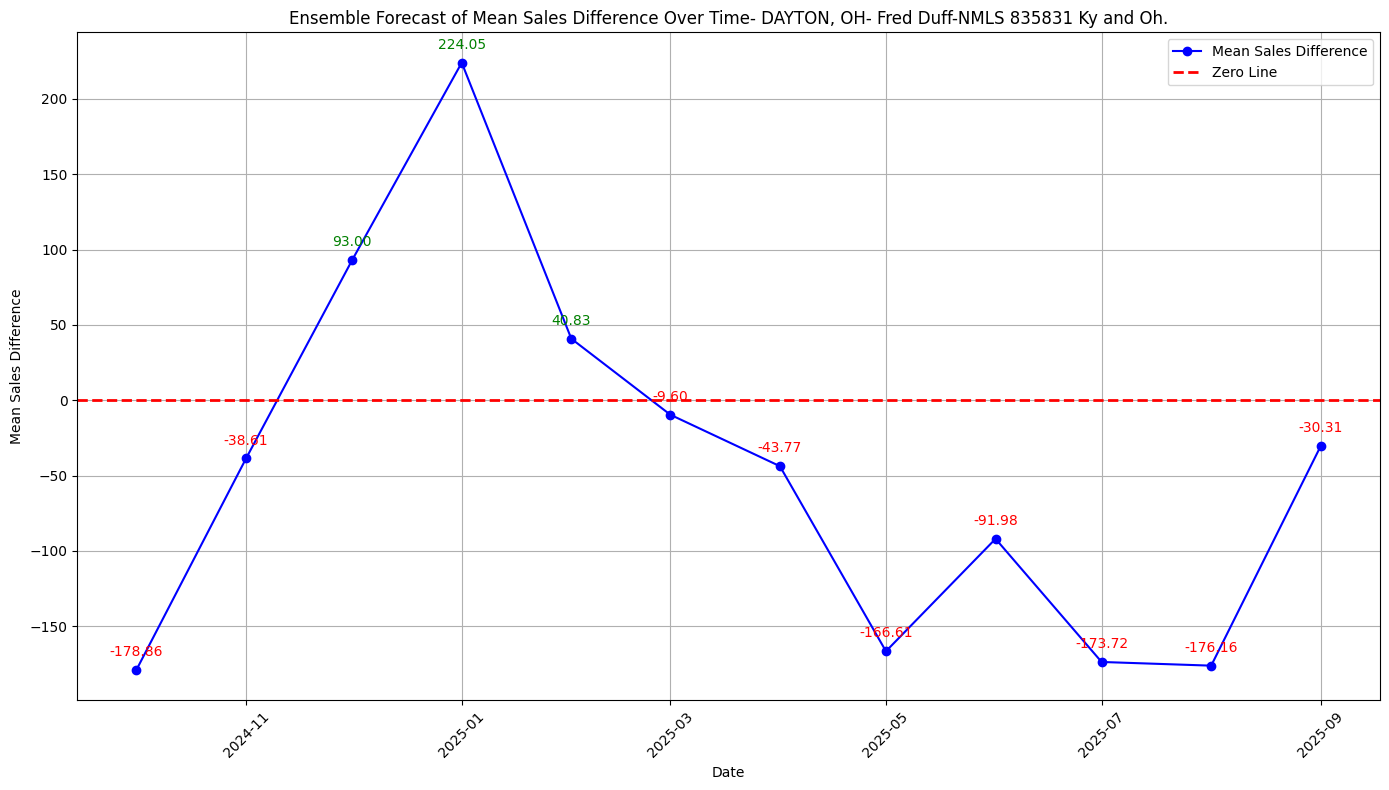

In [142]:
# Ensure your dataframe 'combined_deltasales_df' is correctly set up
print(combined_deltasales_df.head())  # Check the first few rows

# Plot the MeanSalesDifference
plt.figure(figsize=(14, 8))
plt.plot(combined_deltasales_df['Date'], combined_deltasales_df['MeanSalesDifference'], marker='o', linestyle='-', color='b', label='Mean Sales Difference')
# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')
# Annotate each point with its value, colored by positive/negative
for i, value in enumerate(combined_deltasales_df['MeanSalesDifference']):
    color = 'green' if value > 0 else 'red'
    plt.annotate(f'{value:.2f}', (combined_deltasales_df['Date'][i], value),
                 textcoords="offset points", xytext=(0,10), ha='center', color=color)
# Customize the plot
plt.title('Ensemble Forecast of Mean Sales Difference Over Time- DAYTON, OH- Fred Duff-NMLS 835831 Ky and Oh.')
plt.xlabel('Date')
plt.ylabel('Mean Sales Difference')
plt.legend()
plt.grid(True)
# Set both x-axis and y-axis to have 12 labels
ax = plt.gca()
# ax.yaxis.set_major_locator(MaxNLocator(nbins=20))
# ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout
plt.show()


In [143]:
past_sales

0     1809.0
1     1654.0
2     1521.0
3     1245.0
4     1473.0
5     1544.0
6     1570.0
7     1706.0
8     1596.0
9     1648.0
10    1628.0
11    1427.0
Name: Sales, dtype: float64

In [144]:
combined_deltasales_df

Date  SARIMASales  VARSales    CNNSales  MeanSalesDifference
0  2024-10-01  -265.473846   -406.05  134.933061          -178.863595
1  2024-11-01  -190.183757   -233.11  307.476558           -38.605733
2  2024-12-01   -98.812329    -78.49  456.316138            93.004603
3  2025-01-01   -72.571839    212.33  532.395896           224.051353
4  2025-02-01  -103.106517     -9.87  235.474903            40.832796
5  2025-03-01   -56.512014    -82.56  110.278452            -9.597854
6  2025-04-01   -68.468819   -114.97   52.137086           -43.767244
7  2025-05-01   -90.494831   -259.47 -149.850301          -166.605044
8  2025-06-01   -48.627541   -158.23  -69.067873           -91.975138
9  2025-07-01  -106.587474   -218.25 -196.309619          -173.715698
10 2025-08-01   -98.762166   -205.15 -224.574252          -176.162139
11 2025-09-01    22.347447     -9.98 -103.296181           -30.309578